In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rcParams['figure.figsize'] = [15,8]

**Odds and Odds Ratio**

In [ ]:
# example to display how log odds help to differentiate between the Odds in favour and Odd in against
#p=6/10
odds_in_favor= 6/4
print("odds in favour=",odds_in_favor)

print("Log of odds", np.log(odds_in_favor))

odds_against= 4/6
print("odds against =", odds_against)
print("Log of odds against",  np.log(odds_against))

# odds are called as likelihoods and log(odds)  log-likelihoods are same in magnitude

odds in favour= 1.5
Log of odds 0.4054651081081644
odds against = 0.6666666666666666
Log of odds against -0.40546510810816444


### Logistic Regression - BKT Fish

In [ ]:
import statsmodels.api as sm
bkt=[1085.33, 1210, 1780.62, 52.4, 200, 2502.67, 301.33,
     542, 969.33, 240.56, 1640, 247, 999.99, 1220.76,
     150.67, 160, 2816, 760, 1350, 1370]

import statsmodels.api as sm
bkt=sm.add_constant(bkt)    # Descirptive feature

Act_fish=[0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1]    #target

# sm.logit(y,x)
logreg = sm.Logit(Act_fish, bkt).fit()


# print the summary of the model
print(logreg.summary())    #ols.summary()

Optimization terminated successfully.
         Current function value: 0.535560
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Fri, 25 Aug 2023   Pseudo R-squ.:                  0.2217
Time:                        01:14:22   Log-Likelihood:                -10.711
converged:                       True   LL-Null:                       -13.763
Covariance Type:            nonrobust   LLR p-value:                   0.01349
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9509      1.001     -1.949      0.051      -3.913       0.011
x1             0.0018      0.

In [ ]:
bkt_val=[1085.33, 1210, 1780.62, 52.4, 200, 2502.67, 301.33,
     542, 969.33, 240.56, 1640, 247, 999.99, 1220.76,
     150.67, 160, 2816, 760, 1350, 1370]

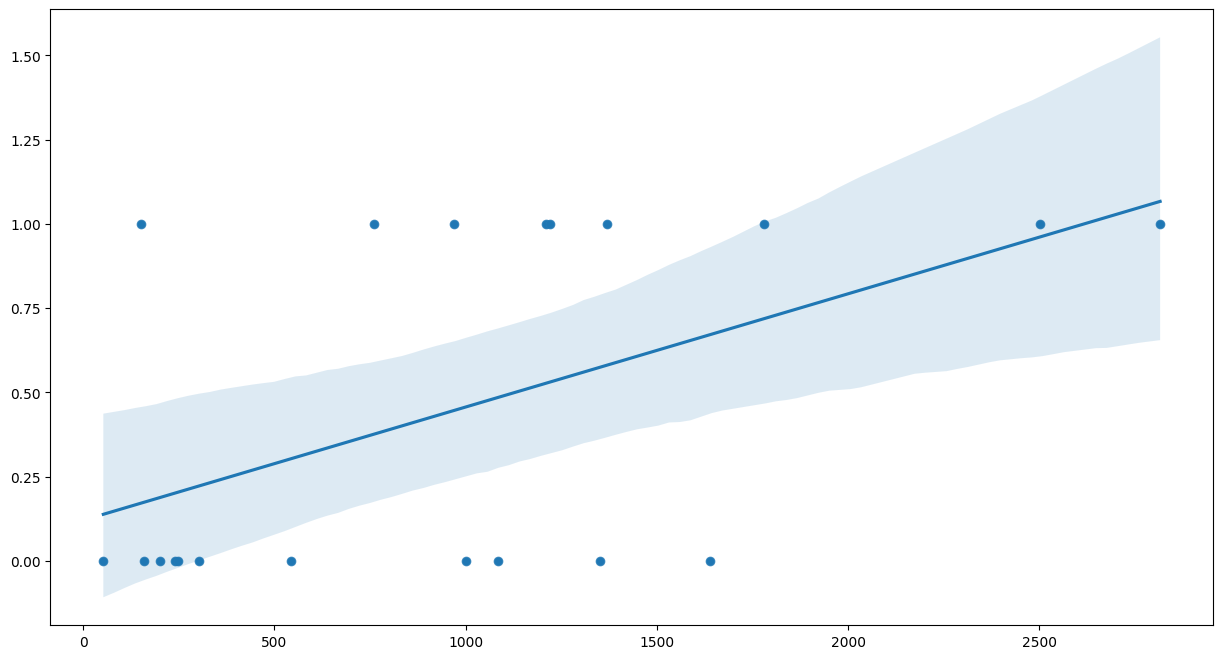

In [ ]:
sns.scatterplot(x=bkt_val,y=Act_fish)
sns.regplot(x=bkt_val, y=Act_fish)
plt.show()

**Sample of Sigmoid Curve - Just an illustration**

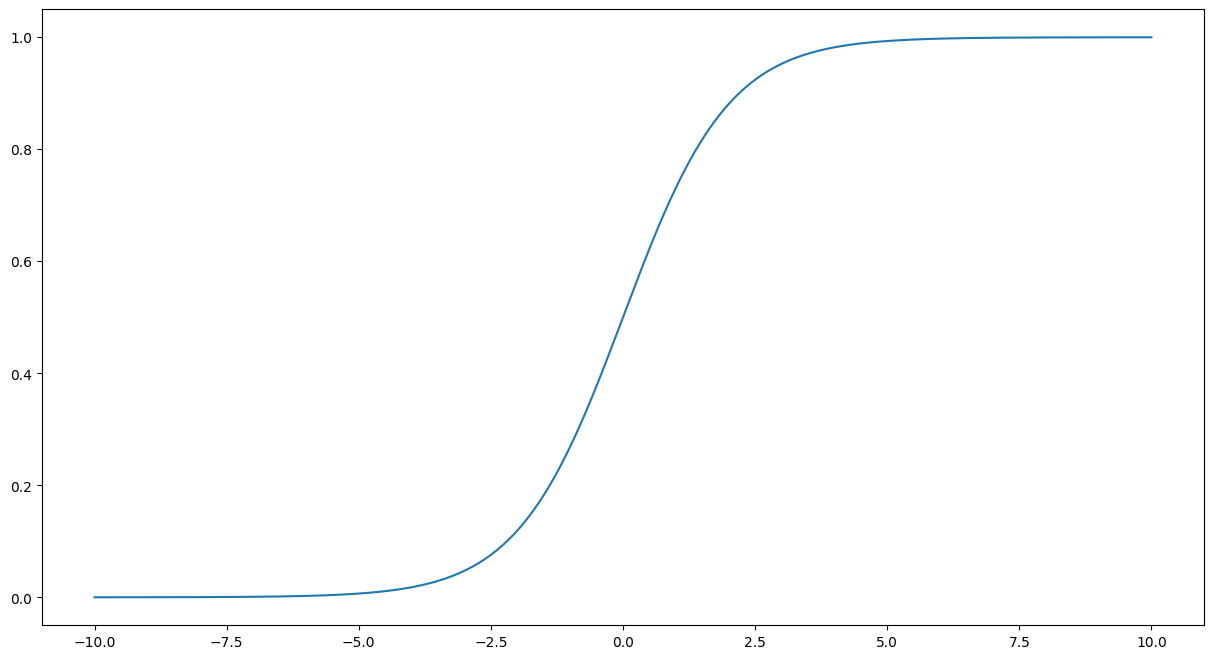

In [ ]:
z=np.arange(-10,10,0.001)
sns.lineplot(x=z,  y=1/(1+np.exp(-z)))
plt.show()

**Prediction from model**

In [ ]:
logreg.predict(bkt)

array([0.50239627, 0.55842659, 0.77997152, 0.13514477, 0.16943977,
       0.92888937, 0.19677584, 0.27451352, 0.45017892, 0.18000131,
       0.7333128 , 0.1817247 , 0.46392129, 0.56321365, 0.15726655,
       0.15951305, 0.95834261, 0.35937808, 0.61955586, 0.62803354])

In [ ]:
# Its a smaller dataset and hence predicting on the same data
# As we are using statsmodel for Logistic, expect the output in terms of probabilities

# The output will be probabilities
pred_p_fish= logreg.predict(bkt)


In [ ]:
bkt
# the first value is the constant and the second set of values are the actual value - 1085.33

array([[1.00000e+00, 1.08533e+03],
       [1.00000e+00, 1.21000e+03],
       [1.00000e+00, 1.78062e+03],
       [1.00000e+00, 5.24000e+01],
       [1.00000e+00, 2.00000e+02],
       [1.00000e+00, 2.50267e+03],
       [1.00000e+00, 3.01330e+02],
       [1.00000e+00, 5.42000e+02],
       [1.00000e+00, 9.69330e+02],
       [1.00000e+00, 2.40560e+02],
       [1.00000e+00, 1.64000e+03],
       [1.00000e+00, 2.47000e+02],
       [1.00000e+00, 9.99990e+02],
       [1.00000e+00, 1.22076e+03],
       [1.00000e+00, 1.50670e+02],
       [1.00000e+00, 1.60000e+02],
       [1.00000e+00, 2.81600e+03],
       [1.00000e+00, 7.60000e+02],
       [1.00000e+00, 1.35000e+03],
       [1.00000e+00, 1.37000e+03]])

**Lets visualize - how the transformed linear regression line looks like**

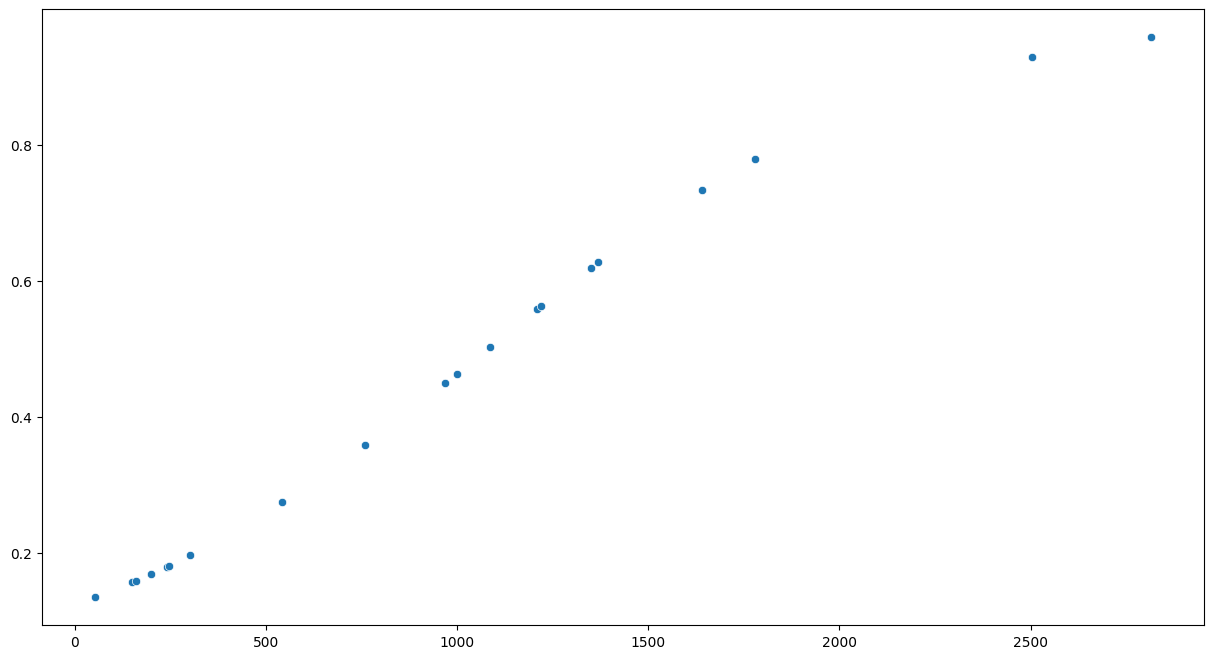

In [ ]:
sns.scatterplot(x= bkt[:,1], y= pred_p_fish)
plt.show()

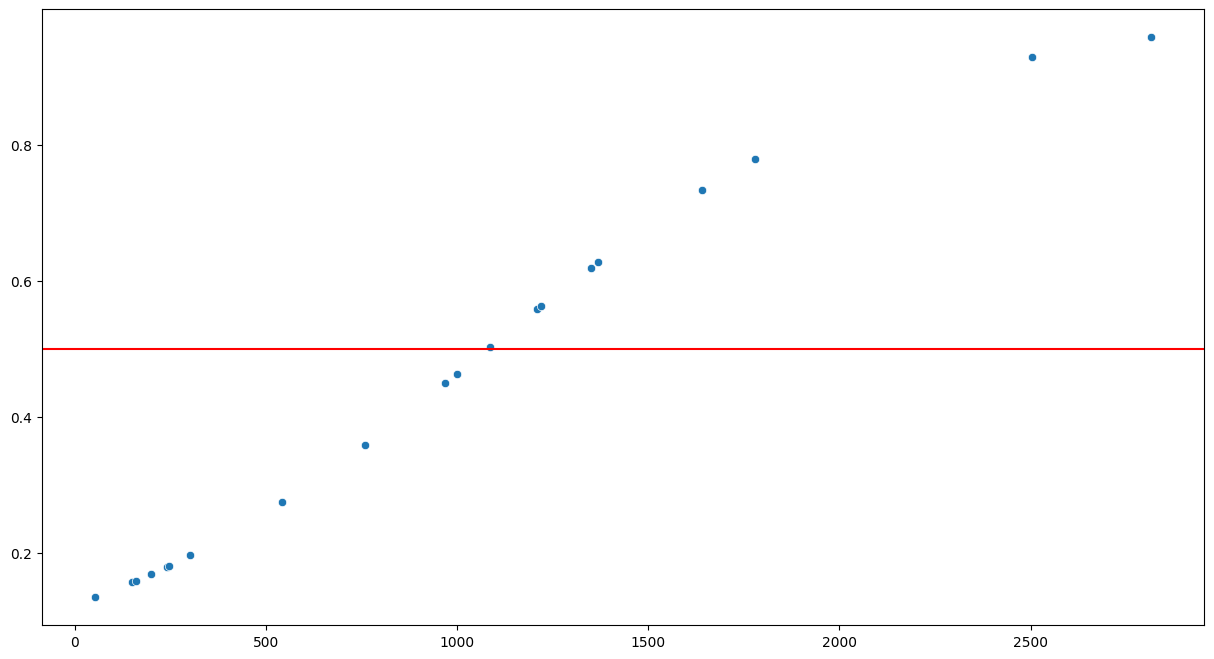

In [ ]:
sns.scatterplot(x= bkt[:,1], y= pred_p_fish)
plt.axhline(0.5,color='red')
plt.show()

**Convert Probabilities into Class of 1 and Class of 0**

In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_predp = [ 0 if x < 0.5 else 1 for x in pred_p_fish]
print(y_predp, Act_fish)

[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1] [0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1]


**Constant and Slope coefficients**

In [ ]:
logreg.params

array([-1.95086663e+00,  1.80631861e-03])

In [ ]:
logodds_equation = -1.9509 + 0.0018  * bkt[:,1]
print(logodds_equation)

[ 2.694000e-03  2.271000e-01  1.254216e+00 -1.856580e+00 -1.590900e+00
  2.553906e+00 -1.408506e+00 -9.753000e-01 -2.061060e-01 -1.517892e+00
  1.001100e+00 -1.506300e+00 -1.509180e-01  2.464680e-01 -1.679694e+00
 -1.662900e+00  3.117900e+00 -5.829000e-01  4.791000e-01  5.151000e-01]


In [ ]:
y_fish=np.array(Act_fish)

In [ ]:
pred_p_fish

array([0.50239627, 0.55842659, 0.77997152, 0.13514477, 0.16943977,
       0.92888937, 0.19677584, 0.27451352, 0.45017892, 0.18000131,
       0.7333128 , 0.1817247 , 0.46392129, 0.56321365, 0.15726655,
       0.15951305, 0.95834261, 0.35937808, 0.61955586, 0.62803354])

In [ ]:
def likelihood(yi, pred_p):
    lkd=((pred_p)**yi) * ((1-pred_p) **(1-yi))
    return lkd

lkd=likelihood(y_fish, pred_p_fish)
print(lkd)

[0.49760373 0.55842659 0.77997152 0.86485523 0.83056023 0.92888937
 0.80322416 0.72548648 0.45017892 0.81999869 0.2666872  0.8182753
 0.53607871 0.56321365 0.15726655 0.84048695 0.95834261 0.35937808
 0.38044414 0.62803354]


In [ ]:
LL_fitted = np.log(np.prod(lkd))
LL_fitted

-10.711192512103189

**Beta coefficients **

In [ ]:
logreg.params

array([-1.95086663e+00,  1.80631861e-03])

In [ ]:
# These are the x values- density of the BKT Fish Which is the x independent variable.
bkt[:,1]

array([1085.33, 1210.  , 1780.62,   52.4 ,  200.  , 2502.67,  301.33,
        542.  ,  969.33,  240.56, 1640.  ,  247.  ,  999.99, 1220.76,
        150.67,  160.  , 2816.  ,  760.  , 1350.  , 1370.  ])

In [ ]:
# expressing the logodds and linear regression line

lgodds = -1.9509 + 0.0018  * bkt[:,1] #this is between -inf to inf.Here bkt[:,1] means take all rows and from first column(exclude constant)
print(lgodds)

[ 2.694000e-03  2.271000e-01  1.254216e+00 -1.856580e+00 -1.590900e+00
  2.553906e+00 -1.408506e+00 -9.753000e-01 -2.061060e-01 -1.517892e+00
  1.001100e+00 -1.506300e+00 -1.509180e-01  2.464680e-01 -1.679694e+00
 -1.662900e+00  3.117900e+00 -5.829000e-01  4.791000e-01  5.151000e-01]


### Null Model

In [ ]:
def lik_fit(yi, pred_p):     # yi is the target column and pred_p are the probs predicted from logit
    lkd=((pred_p)**yi) * ((1-pred_p) **(1-yi))
    #print(lkd)
    ll_lkd=np.log(np.prod(lkd))
    return(ll_lkd)

In [ ]:
# there are 11 0's and 9 1's . P(0) = 11/20 and P(1) = 9/20
# 0 - 0.55  1 - 0.45
null_fish=np.array([0.55,0.45,0.45,0.55,0.55,
                    0.45,0.55,0.55,0.45,0.55,
                    0.55,0.55,0.55,0.45,0.45,
                    0.55,0.45,0.45,0.55,0.45])    # probs predicted from null model
print(null_fish )                       # these are the probabilities predicted from null model

LL_null = lik_fit(y_fish, null_fish)
print(LL_null)

[0.55 0.45 0.45 0.55 0.55 0.45 0.55 0.55 0.45 0.55 0.55 0.55 0.55 0.45
 0.45 0.55 0.45 0.45 0.55 0.45]
-15.970153924355433


In [ ]:
# sometimes the algorithm goes and defaults the prediction to 0.50 instead of calculating as given above.
# this is what it has done here. Default is being set to 0.50. Equally probable

null_fish=np.array([0.50,0.50,0.50,0.50,0.50,
                    0.50,0.50,0.50,0.50,0.50,
                    0.50,0.50,0.50,0.50,0.50,
                    0.50,0.50,0.50,0.50,0.50])    # probs predicted from null model
print(null_fish )                       # these are the probabilities predicted from null model

LL_null = lik_fit(y_fish, null_fish)
print(LL_null)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5]
-13.862943611198906


### Saturated Model

In [ ]:
## Loglikelihood of the saturated Model
# A saturated model is one which is perfect i.e it predicts all 0s as 0s and all 1s as 1s
# so predictions from the perfect model are same as the target values

per_fish = y_fish     # probabilities predicted form the saturated model are the same as true values
LL_saturated = lik_fit(y_fish, per_fish)
print(LL_saturated)

0.0


### LogLikelihood of the Models

In [ ]:
print("LL_fitted =",LL_fitted)
print("LL_null =",LL_null)
print("LL_saturated =",LL_saturated)

LL_fitted = -10.711192512103189
LL_null = -13.862943611198906
LL_saturated = 0.0


### Deviance of Models

**Fitted Models**

In [ ]:
dev_residual = -2*(LL_fitted)
print("Deviance residual=",dev_residual)

Deviance residual= 21.422385024206378


**Null Model**

In [ ]:
dev_null=-2 *(LL_null)
print("Null_deviance",dev_null)

Null_deviance 27.725887222397812


**How far is Fitted from Null**

In [ ]:
dev_model = dev_null - dev_residual
print("The deviance of Model is =", dev_model)

The deviance of Model is = 6.303502198191435


**McFadden R2**

In [ ]:
# pseudo r2
# Mcfadden R2 1- llf/llr
mcf_r2=1-(logreg.llf/logreg.llnull)    # both values from model.summary()
mcf_r2

# we want  llf to be much smaller in magnitude than llnull
# Mcfadden r2 should be closer to 1 for a good model
# This is like the r2squared of Linear Regression

0.22172733915737475

**Akakike Information Criteria**

In [ ]:
# AIC(Akaike Information Criterai)

aic = -2* logreg.llf + 2*2    # Here k=2 since beta0 to beta1 are to be estimated
print("aic:=", aic)

print("The AIC value", logreg.aic)

aic:= 25.42238502420638
The AIC value 25.42238502420638


**Admission Predict Case Study**

In [ ]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv("Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [ ]:
df.shape

(400, 9)

In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.2 KB


In [ ]:
df.drop('Serial No.', axis =1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [ ]:
df.columns


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
X= df.drop('Chance of Admit',axis=1)
y =df['Chance of Admit']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,
                                             test_size=0.20,
                                             random_state=10)

In [ ]:
ytrain.value_counts(normalize=True)
# This seems to be balanced dataset.

0    0.55625
1    0.44375
Name: Chance of Admit, dtype: float64

In [ ]:
xtrain.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [ ]:
xtrain_c=sm.add_constant(xtrain)
xtest_c=sm.add_constant(xtest)

In [ ]:
xtrain_c.columns

Index(['const', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR',
       'CGPA', 'Research'],
      dtype='object')

In [ ]:
logreg =sm.Logit(ytrain,xtrain_c).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.241326
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            7
Date:                Fri, 25 Aug 2023   Pseudo R-squ.:                  0.6486
Time:                        01:14:24   Log-Likelihood:                -77.224
converged:                       True   LL-Null:                       -219.78
Covariance Type:            nonrobust   LLR p-value:                 9.137e-58
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -63.1763     11.315     -5.583      0.000     -85.354     -40.998
GRE Scor

1. Except for CGPA, all the variables are insignificant.
2. The weight for CGPA is the heighest. Max weight is given to CGPA whereas other variables have very less weights.

**Significance of the variables**

In [ ]:
# H0 : beta value is significant
# Reject H0 if pvalue < 0.05
# H0 is betai's is not significant betai = 0
# here pval>0.05 so we fail to reject H0 ie the coeffs are not significant

# only CGPA is signofocant
0.6095/0.447

# wherever the pvalue<0.05 those coefficients are significant or those features are significant

1.3635346756152127

**Overall Significance of the Model**

In [ ]:
# Look at the llr_pvalue
# if this value is less than 0.05 then the overall model is significant


# H0: Logistic Model is Insignificant.
# Ha :Logistic Model is Significant.

logreg.llr_pvalue


# slide 91, 92 LRT test

9.136840797093485e-58

**McFadden R2**

 The `Pseudo R-squ.` above is the value of `McFadden's R-squared`.

<p style='text-indent:25em'> <strong> McFadden's R-squared = $ 1 - \frac{Log-Likelihood}{LL-Null} $</strong> </p>

In [ ]:
# Log LIkelihood of Full model / fitted model = -77.224
# Log likelihood of Null Model = -219.78

1- (-77.224/-219.78)

0.6486304486304486

**AIC - Akaike Information Criteria**

 The AIC is relative measure. To know if

<p style='text-indent:25em'> <strong> AIC = $ -2({Log-Likelihood})
 + 2k$</strong> </p>

**Interpretation of variables**

Interpretation in terms of Log(odds)

In [ ]:
logreg.params

# Log(odds)=beta0+beta1 * X1 +beta2 * X2 +beta3 * X3
# For every one unit change in X1  there is beta1 units change in Log(odds)

const               -63.176338
GRE Score             0.053187
TOEFL Score           0.032814
University Rating     0.515006
SOP                   0.175796
LOR                   0.570331
CGPA                  4.411370
Research              0.581890
dtype: float64

Interpretation in terms of Odds

In [ ]:
odds= (np.exp(logreg.params))

odds

const                3.654811e-28
GRE Score            1.054626e+00
TOEFL Score          1.033359e+00
University Rating    1.673648e+00
SOP                  1.192195e+00
LOR                  1.768853e+00
CGPA                 8.238225e+01
Research             1.789418e+00
dtype: float64

### Predict and Find the Model Performance Metrics

In [ ]:
ypred_prob= logreg.predict(xtest_c)

In [ ]:
ypred_prob[0:5] # get the first 5 values of prediction

332    0.050634
111    0.800663
352    0.016492
205    0.000668
56     0.001146
dtype: float64

In [ ]:
# using list comprehension
ypred=[0 if i <=0.5 else 1 for i in ypred_prob]
ypred[0:5]

[0, 1, 0, 0, 0]

In [ ]:
ytest[0:5] # these are the actuals

332    1
111    0
352    0
205    0
56     0
Name: Chance of Admit, dtype: int64

1. out of the 5 elements listed above, two are incorrect and 3 are right prediction.
2. These are called as misclassification.
3. If we take only these 5 elements, we can say that the accuracy is  3/5 which is 60%.

#### Lets find the model accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.825

The accuracy of the model is 82.5%

In [ ]:
np.log(0.497) + (np.log(0.558))

-1.2825615694863344

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[33,  9],
       [ 5, 33]])

In [ ]:
cm=confusion_matrix(ytest,ypred)

In [ ]:
(33+33)/ (33+5+9+33)

0.825

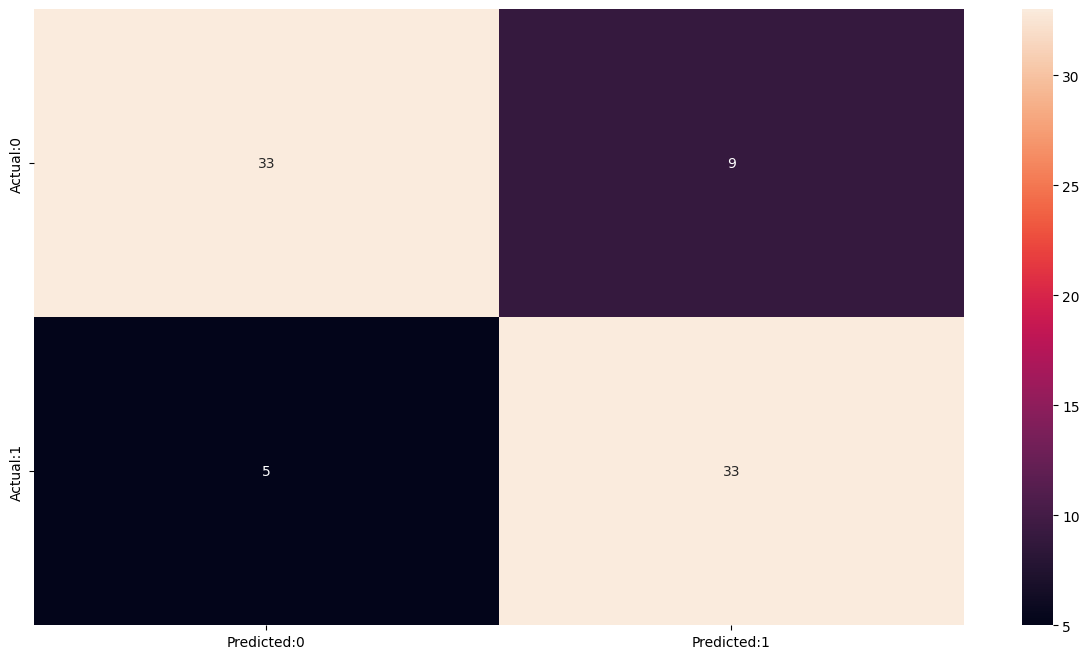

In [ ]:
import seaborn as sns
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix,annot=True)
plt.show()

In [ ]:
cm

array([[33,  9],
       [ 5, 33]])

In [ ]:
TN = cm[0,0]
FP =cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [ ]:
#sensitivity recall for positive class
sensitivity = TP /(FN+TP)
sensitivity

0.868421052631579

In [ ]:
#specificity recall for Negative class
specificity = TN /(TN+FP)
specificity

0.7857142857142857

In [ ]:
from sklearn.metrics import recall_score
recall_score(ytest,ypred)

0.868421052631579

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.82        42
           1       0.79      0.87      0.82        38

    accuracy                           0.82        80
   macro avg       0.83      0.83      0.82        80
weighted avg       0.83      0.82      0.82        80



In [ ]:
from sklearn.metrics import log_loss
print(log_loss(ytest,ypred))

6.307639343095502


**This is on the higher side. This value should be closed to 0.**

In [ ]:
ypred_prob

332    0.050634
111    0.800663
352    0.016492
205    0.000668
56     0.001146
         ...   
304    0.037234
187    0.997764
166    0.118340
64     0.549633
27     0.000442
Length: 80, dtype: float64

**Print the first 5 rows**

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

1. In all the above metrics- we were passing ytest and ypred. ypred is the label
2. In ROC curve, we are passing ytest and ypred_prob. Here we pass the probabilities.
3. We are focusing on positive class and not negative class.
4. ROC curve gives us 3 set  values - First is FPR, Second -TPR and third -Threshold.

In [ ]:
print(roc_curve(ytest,ypred_prob))

(array([0.        , 0.        , 0.        , 0.02380952, 0.02380952,
       0.04761905, 0.04761905, 0.14285714, 0.14285714, 0.23809524,
       0.23809524, 0.30952381, 0.30952381, 0.33333333, 0.33333333,
       0.54761905, 0.54761905, 1.        ]), array([0.        , 0.02631579, 0.63157895, 0.63157895, 0.71052632,
       0.71052632, 0.76315789, 0.76315789, 0.86842105, 0.86842105,
       0.92105263, 0.92105263, 0.94736842, 0.94736842, 0.97368421,
       0.97368421, 1.        , 1.        ]), array([1.99954144e+00, 9.99541441e-01, 9.31355628e-01, 9.09319667e-01,
       8.60956416e-01, 8.58806131e-01, 8.41911606e-01, 7.97157602e-01,
       6.18555435e-01, 4.92806012e-01, 3.80298891e-01, 2.33502048e-01,
       2.21233752e-01, 2.20817772e-01, 1.95004427e-01, 6.35077653e-02,
       5.06341297e-02, 1.00881402e-04]))


In [ ]:
fpr,tpr,threshold =roc_curve(ytest,ypred_prob)

**Now plot - fpr, tpr**

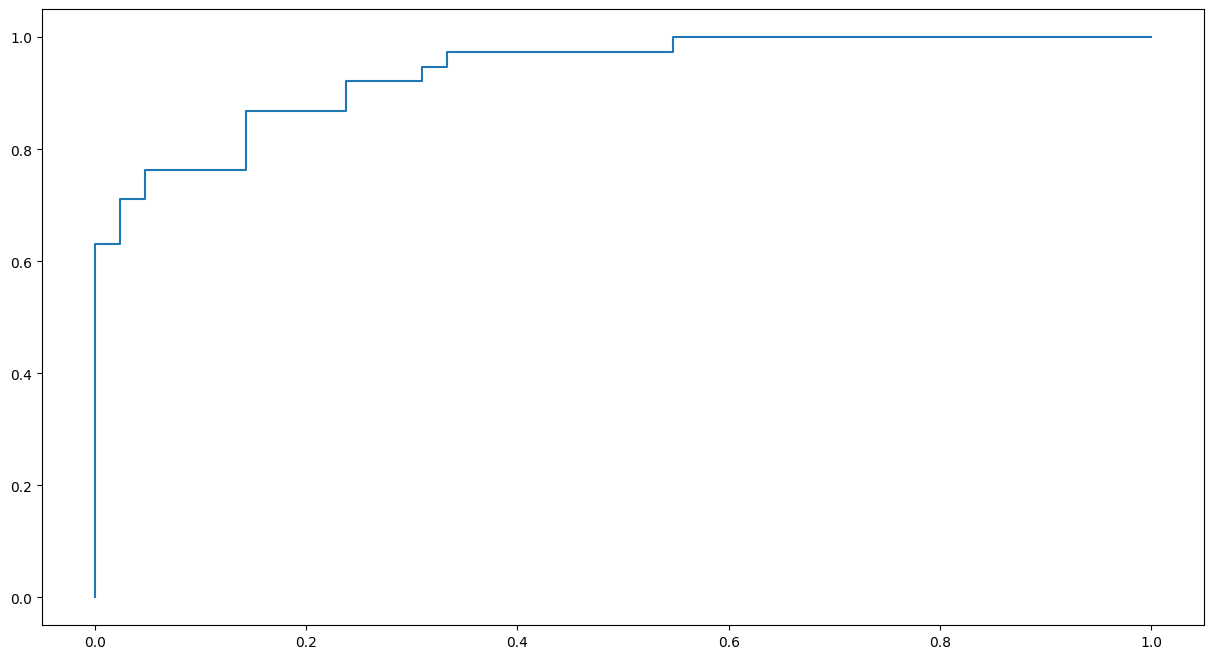

In [ ]:
plt.plot(fpr,tpr)

0.93671679197995


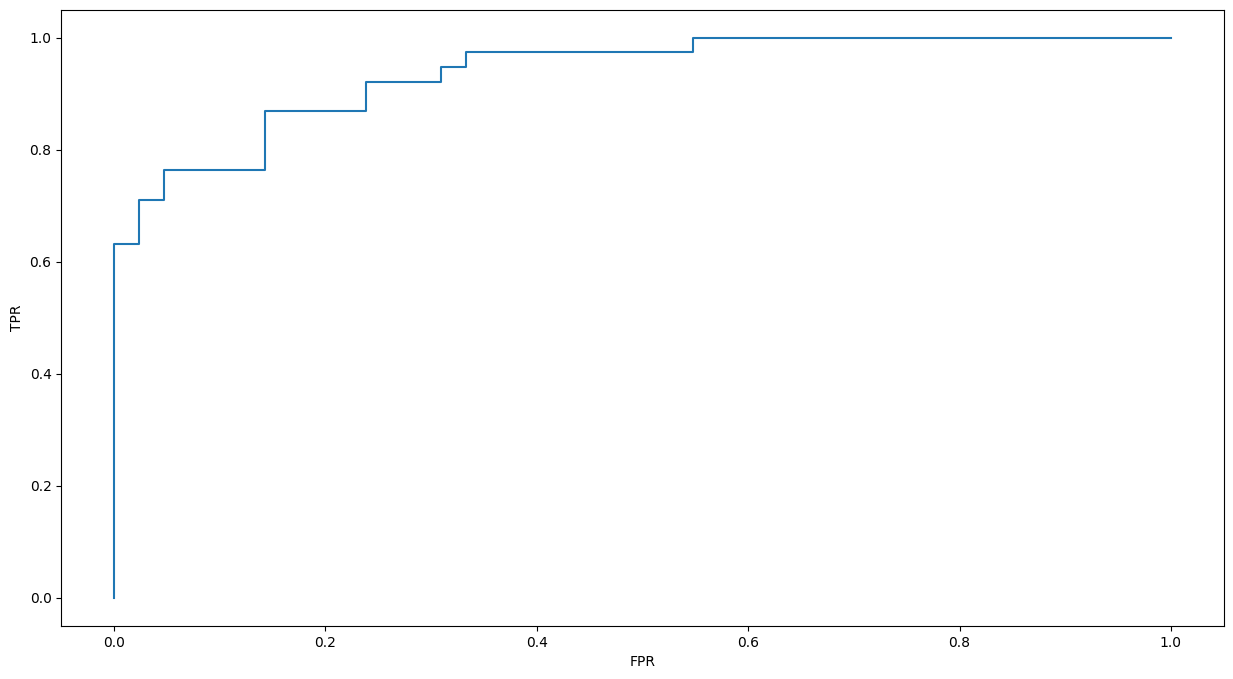

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

print(roc_auc_score(ytest,ypred_prob))

**Reliability- cohen kappa score**

In [ ]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(ytest,ypred))

0.6508728179551122


This is pretty good reliability for the model.

1. Only in AUC, ROC -We use probability and not in all others

**All at one Summary Table**

In [ ]:

from sklearn.metrics import recall_score,precision_score,f1_score



In [ ]:
# create an empty dataframe to store the scores for various algorithms
perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

In [ ]:
def per_measures(model,test,pred):


  accuracy    =accuracy_score(test,pred)
  f1score     =f1_score(test,pred)
  recall      =recall_score(test,pred)
  precision   =precision_score(test,pred)
  # aic         =model.aic
  # reliability = cohen_kappa_score(test,pred)



  return (accuracy,recall,precision,f1score,)

In [ ]:
def update_performance (name,
                        model,
                        test,
                        pred
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[4],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[5]

                                     },
                                   ignore_index = True)

In [ ]:
update_performance(name = 'LogisticReg-Base', model = logreg,test=ytest,pred=ypred)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.825,0.868421,0.785714,0.825


## Can the Performance enhanced using cut off values

In [ ]:
xtest.shape

(80, 7)

In [ ]:
ytest.shape

(80,)

In [ ]:
logreg.params

const               -63.176338
GRE Score             0.053187
TOEFL Score           0.032814
University Rating     0.515006
SOP                   0.175796
LOR                   0.570331
CGPA                  4.411370
Research              0.581890
dtype: float64

In [ ]:
# import various functions from sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [ ]:
# consider a list of values for cut-off

cutoff_per = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

thresh_value = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


for cutoff in thresh_value:


  ypred_prob = logreg.predict(xtest_c)
  ypred = [ 0 if x < cutoff else 1 for x in ypred_prob]

  global cutoff_per

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
  cutoff_per = cutoff_per.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(ytest, ypred),
                                    'Precision Score': metrics.precision_score(ytest, ypred),
                                    'Recall Score': metrics.recall_score(ytest, ypred),
                                    'Accuracy Score': metrics.accuracy_score(ytest, ypred),
                                    'Kappa Score':metrics.cohen_kappa_score(ytest, ypred),
                                    'f1-score': metrics.f1_score(ytest, ypred)},
                                    ignore_index = True)






In [ ]:
cutoff_per

,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.1,0.760652,0.660714,0.973684,0.7500,0.509804,0.787234
1,0.2,0.807018,0.720000,0.947368,0.8000,0.604938,0.818182
2,0.3,0.829574,0.760870,0.921053,0.8250,0.652605,0.833333
3,0.4,0.828321,0.772727,0.894737,0.8250,0.651741,0.829268
4,0.5,0.827068,0.785714,0.868421,0.8250,0.650873,0.825000
5,0.6,0.862782,0.846154,0.868421,0.8625,0.724656,0.857143
6,0.7,0.823308,0.833333,0.789474,0.8250,0.648241,0.810811
7,0.8,0.822055,0.852941,0.763158,0.8250,0.647355,0.805556
8,0.9,0.803885,0.960000,0.631579,0.8125,0.617834,0.761905


1. Best results are obtained for cutoff value of 0.6
2. We can start using cutoff =0.6 instead of cutoff = 0.5

<a id="youden"></a>
### Youden's Index

Youden's Index is the classification cut-off probability for which the (Sensitivity + Specificity - 1) is maximized.<br>

<p style='text-indent:12em'> <strong>Youden's Index = max(Sensitivity + Specificity - 1) = max(TPR + TNR - 1) = max(TPR - FPR) </strong> </p>

i.e. select the cut-off probability for which the (TPR - FPR) is maximum.

In [ ]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': threshold})


# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR


youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.868421,0.142857,0.618555,0.725564
1,0.763158,0.047619,0.841912,0.715539
2,0.710526,0.023810,0.860956,0.686717
3,0.921053,0.238095,0.380299,0.682957
4,0.710526,0.047619,0.858806,0.662907


In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.62 else 1 for x in ypred_prob]

In [ ]:
acc_table = classification_report(ytest, y_pred_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.84      0.84      0.84        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



In [ ]:
update_performance(name = 'LogisticReg-Youden', model = logreg,test=ytest,pred=y_pred_youden)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.825,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.850,0.842105,0.842105,0.842105


**SKLEARN - LOGISTIC REGRESSION**

There are no parameters in logistic regression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,
                                             test_size=0.20,
                                             random_state=10)

In [ ]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

ypred_lr_train = lr.predict(xtrain)
ypred_lr= lr.predict(xtest)

ypred_lr

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0])

**Training Performance**

In [ ]:
print(accuracy_score(ytrain,ypred_lr_train))
print(confusion_matrix(ytrain,ypred_lr_train))
print(classification_report(ytrain,ypred_lr_train))

0.8625
[[159  19]
 [ 25 117]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       178
           1       0.86      0.82      0.84       142

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



**Testing Performance**

In [ ]:
print(accuracy_score(ytest,ypred_lr))
print(confusion_matrix(ytest,ypred_lr))
print(classification_report(ytest,ypred_lr))

0.775
[[32 10]
 [ 8 30]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        42
           1       0.75      0.79      0.77        38

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.78      0.78        80



**1. There se**ems to be large difference between Train and Test Data

### Summarize the logistic Regression

In [ ]:
update_performance(name = 'LogisticReg-skl', model = lr,test=ytest,pred=ypred_lr)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.825,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.850,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.775,0.789474,0.750000,0.769231


**Entropy**

# Decision Tree -Classification

Decision Tree is a non-parametric supervised learning method. It builds a model in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets, which is called splitting. A decision node is a node on which a decision of split is to be made. A node that can not be split further is known as the terminal/leaf node. A leaf node represents the decision. A decision tree can work with both numerical and categorical variables.

A decision tree for classification is built using criteria like the Gini index and entropy.

## Gini Index

Gini index measures the probability of the sample being wrongly classified. The value of the Gini index varies between 0 and 1. We choose the variable with a low Gini index. The Gini index of the variable is calculated as:
<p style='text-indent:28em'> <strong> $ Gini = 1 - \sum_{i = 1}^{n}p_{i}^{2} $</strong> </p>

Where,<br>
$p_{i}$: Probability of occurrence of the class 'i'

## Entropy

Entropy is one of the criteria used to build the decision tree. It calculates the heterogeneity of the sample. The entropy is zero if the sample is completely homogeneous, and it is equal to 1 if the sample is equally divided. Entropy of the variable 'X' is calculated as:
<p style='text-indent:28em'> <strong> $ E(X) =  -\sum_{i = 1}^{c}p_{i}log_{2}p_{i} $</strong> </p>

Where,<br>
$p_{i}$: Probability of occurrence of the class 'i'

And the conditional emtropy of the variable is given as:
<p style='text-indent:28em'> <strong> $ E(T, X) = \sum_{c \epsilon X}P(c)E(c) $</strong> </p>

Where,<br>
$P(c)$: Probability of occurrence of the class 'c'<br>
$E(c)$: Entropy of the class 'c'

The information gain is the difference between the entropy of the target variable and the entropy of the target variable given an independent variable. We split the on the variable that corresponds to the highest information gain.

## Case Study 1 -Credit Card Purchased or Not Purchased

In [ ]:
# E(class or feature)  = - sum(pc* ln(pc)

# Entropy at the Target Level - CC Purchase
ecc =-0.6*np.log2(0.6)-0.4 *np.log2(0.4)
print(-0.6*np.log2(0.6)-0.4 *np.log2(0.4))


0.9709505944546686


In [ ]:
#
em=(6/15)*(-5/6 * np.log2(5/6) - 1/6 *np.log2(1/6))    # E(CC Purchase|Male)
ef=(9/15) * (-4/9*np.log2(4/9) - 5/9*np.log2(5/9) )     # E(cc purchase|Female)
print("Entropy of CC Purchase given Gender=",em +ef)
print("Information Gain from Feature Gender=", ecc-(em+ef))

Entropy of CC Purchase given Gender= 0.8546546045622749
Information Gain from Feature Gender= 0.11629598989239365


In [ ]:
emrm= (5/6) * ((-5/5) * np.log2(5/5))    # E(CC Purchase|Male)
enmrm=(1/6) * ((- 1/1) * np.log2(1/1))     # E(cc purchase|Female)

emrf= (4/9) * ((-4/4) * np.log2(4/4) )    # E(CC Purchase|Male)
enmrf=(5/9) * ((- 5/5) * np.log2(5/5))     # E(cc purchase|Female)
print("Entropy of CC Purchase given Marital=",emrm +enmrm+emrf+enmrf)
print("Information Gain from Feature Gender=", (em+ef)-(emrm +enmrm+emrf+enmrf))

Entropy of CC Purchase given Marital= -0.0
Information Gain from Feature Gender= 0.8546546045622749


## Case Study 2 -Loan Approved or Rejected

**Find the entropy of Target column**

In [ ]:
ent_loan = -(10/15 * np.log2(10/15) + 5/15 * np.log2(5/15))
print(ent_loan)

0.9182958340544896


**Find the entropy of Loan given Employed**

In [ ]:
# entropy of loan given employed = yes
ent_loan_emp_yes = -(10/15)*((6/10*np.log2(6/10)) + (4/10*np.log2(4/10)))

# entropy of loan given employed =no
ent_loan_emp_no = -(5/15) * ((4/5 * np.log2(4/5))+ (1/5 * np.log2(1/5)) )

ent_loan_emp = ent_loan_emp_yes +ent_loan_emp_no
IG_emp = ent_loan  - ent_loan_emp

print("Entropy at Employed Level =", ent_loan_emp)
print("Information gain from Employed=", IG_emp)

Entropy at Employed Level = 0.8879430945988998
Information gain from Employed= 0.030352739455589806


**Find the entropy of Loan given Credit Score**

In [ ]:
#  Information gain calculation with second feature Credit_score
# entropy of loan given the credit score is high
# entropy of loan given the credit score is low

# in the 7 approved where the credit score is high all of them are approved and none rejected. This becomes a pure node.
ent_loan_CS_high = -(7/15)  * (7/7) * np.log2(7/7)
ent_loan_CS_low = -(8/15) * ((3/8 * np.log2(3/8))+(5/8 * np.log2(5/8)))

ent_loan_CS = ent_loan_CS_high + ent_loan_CS_low
IG_CS = ent_loan  - ent_loan_CS

print("Entropy from Credit Score=", ent_loan_CS)
print("Information gain from Credit Score=", IG_CS)

Entropy from Credit Score= 0.509031468226648
Information gain from Credit Score= 0.40926436582784154


**Find the entropy of Loan given Income**

In [ ]:
#  Information gain calculation with third  feature Income

# entropy of loan given income is high
# entropy of loan given income is low

ent_loan_Inc_high = -(4/15) * (4/4*np.log2(4/4))
ent_loan_Inc_low = -(11/15) * ((6/11 * np.log2(6/11))+( 5/11 * np.log2(5/11)) )

ent_loan_Inc = ent_loan_Inc_high + ent_loan_Inc_low
IG_Inc = ent_loan  - ent_loan_Inc

print("Entropy from Income=", ent_loan_Inc)
print("Information gain from Income=", IG_Inc)

Entropy from Income= 0.7289554884164346
Information gain from Income= 0.1893403456380549


**Find the entropy of Loan given Dependents**

In [ ]:
#  Information gain calculation with forth   feature Depdendent

# entropy of loan given dependent is yes
# entropy of loan given dependent is no

ent_loan_Dep_yes = -(7/15)*((2/7*np.log2(2/7)) + (5/7*np.log2(5/7)))
ent_loan_Dep_no = -(8/15) * (8/8 * np.log2(8/8))

ent_loan_Dep = ent_loan_Dep_yes +ent_loan_Dep_no
IG_Dep = ent_loan  - ent_loan_Dep

print("Entropy from Dependents=", ent_loan_Dep)
print("Information gain from Dependent=", IG_Dep)

Entropy from Dependents= 0.4027895986644278
Information gain from Dependent= 0.5155062353900617


## Construction of Decision tree Level 2
* The rows where Dependent = No becomes a leaf node
* Filter nodes where Dependent = Yes

**Entropy at Loan Level**

In [ ]:
# entropy of the target column
# Entropy of Loan in the above subset where depedent=Yes

# entropy at the second level
# first we calculate entropy at the loan level
ent2_loan = -2/7*np.log2(2/7) - (5/7)*np.log2(5/7)
print("Entropy -Target =", ent2_loan)


Entropy -Target = 0.863120568566631


**Entropy of Loan given Employed**

In [ ]:
#Information Gain calculation at level 2
# can be done directly by looking at above table
# Entropy of target Loan and E(loan/employed)

ent2_Emp_yes = -(6/7) * (4/6*np.log2(4/6) + (2/6) * np.log2(2/6))
ent2_Emp_no = -(1/7) * 1 *np.log2(1)
ent2_Emp =  ent2_Emp_yes + ent2_Emp_no    # E(loan|employed)

ig_Emp2 = ent2_loan - ent2_Emp

print("Entropy for Employed = ", ent2_Emp)
print("Information gain for Employed = ", ig_Emp2)

Entropy for Employed =  0.7871107149038481
Information gain for Employed =  0.0760098536627829


**Entropy of Loan given Credit Score**

In [ ]:
#Information Gain calculation at level 2
# Entropy of  E(loan/Credit_score)

#ent_CS = ent_CS_low + ent_CS_high
ent2_CS = (5/7) * ((5/5) *np.log2(5/5) + 0)   +  (2/7) *(2/2*np.log2(2/2) + 0)

ig_CS2 = ent2_loan - ent2_CS

print("Entropy for Credit_Score = ", ent2_CS)
print("Information gain for Cedit_Score = ", ig_CS2)



Entropy for Credit_Score =  0.0
Information gain for Cedit_Score =  0.863120568566631


**Entropy for Loan given Income**

In [ ]:
# Entropy of  E(loan/Income)

ent2_Inc_low = - (6/7) * (1/6*np.log2(1/6) + (5/6) * np.log2(5/6))
ent2_Inc_high = -(1/7) * 1 *np.log2(1)
ent2_Inc =  ent2_Inc_low + ent2_Inc_high

ig_Inc2 = ent2_loan - ent2_Inc

print("Entropy for Income = ", ent2_Inc)
print("Information gain for Income = ", ig_Inc2)

Entropy for Income =  0.5571620756985892
Information gain for Income =  0.3059584928680418


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=10)

dt.fit(xtrain,ytrain)

ypred_dt_train = dt.predict(xtrain)


print(accuracy_score(ytrain,ypred_dt_train))
print(confusion_matrix(ytrain,ypred_dt_train))
print(classification_report(ytrain,ypred_dt_train))

1.0
[[178   0]
 [  0 142]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       142

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [ ]:
dt = DecisionTreeClassifier(random_state=10)

dt.fit(xtrain,ytrain)

ypred_dt = dt.predict(xtest)


print(accuracy_score(ytest,ypred_dt))
print(confusion_matrix(ytest,ypred_dt))
print(classification_report(ytest,ypred_dt))


0.8
[[33  9]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.78      0.82      0.79        38

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



## Over-fitting in Decision Tree

1. The decision tree is said to be over-fitted if it tries to perfectly fit all the observations in the training data. We can calculate the difference between the train and test accuracy to identify if there is over-fitting.
2. Overfitting occurs as the decision tree tries to get the purest form irrespective of the depth of the decision tree.  The tree becomes very big and lands up to be complex algo with several nodes.
3. Overfitting means tree is fitting well on training data and performs poorly on test data.

**Summarize the Decision Tree with Default Criterion as Gini**

In [ ]:
update_performance(name = 'Decision Tree-Gini', model = dt,test=ytest,pred=ypred_dt)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.825,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.850,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.775,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.800,0.815789,0.775000,0.794872


**Lets visualize the Tree which is build by the Model**

In [ ]:
from sklearn import tree


In [ ]:
dt_file=open('dt.dot','w')
dot_data=tree.export_graphviz(dt,out_file=dt_file)
dt_file.close()


In [ ]:
features=xtrain.columns
dt_file=open('dt.dot','w')
dot_data=tree.export_graphviz(dt,out_file=dt_file,
                   features=xtrain.columns
dt_file=open('dt.dot','w')
dot_data=tree.export_graphviz(dt,out_file=dt_file,
                              feature_names=features,
                              class_names=['0','1'],
                              filled=True,
                              rounded=True)
dt_file.close()           feature_names=features,
                              class_names=['0','1'],
                              filled=True,
                              rounded=True)
dt_file.close()

**To visualize open Webgraphviz.com**

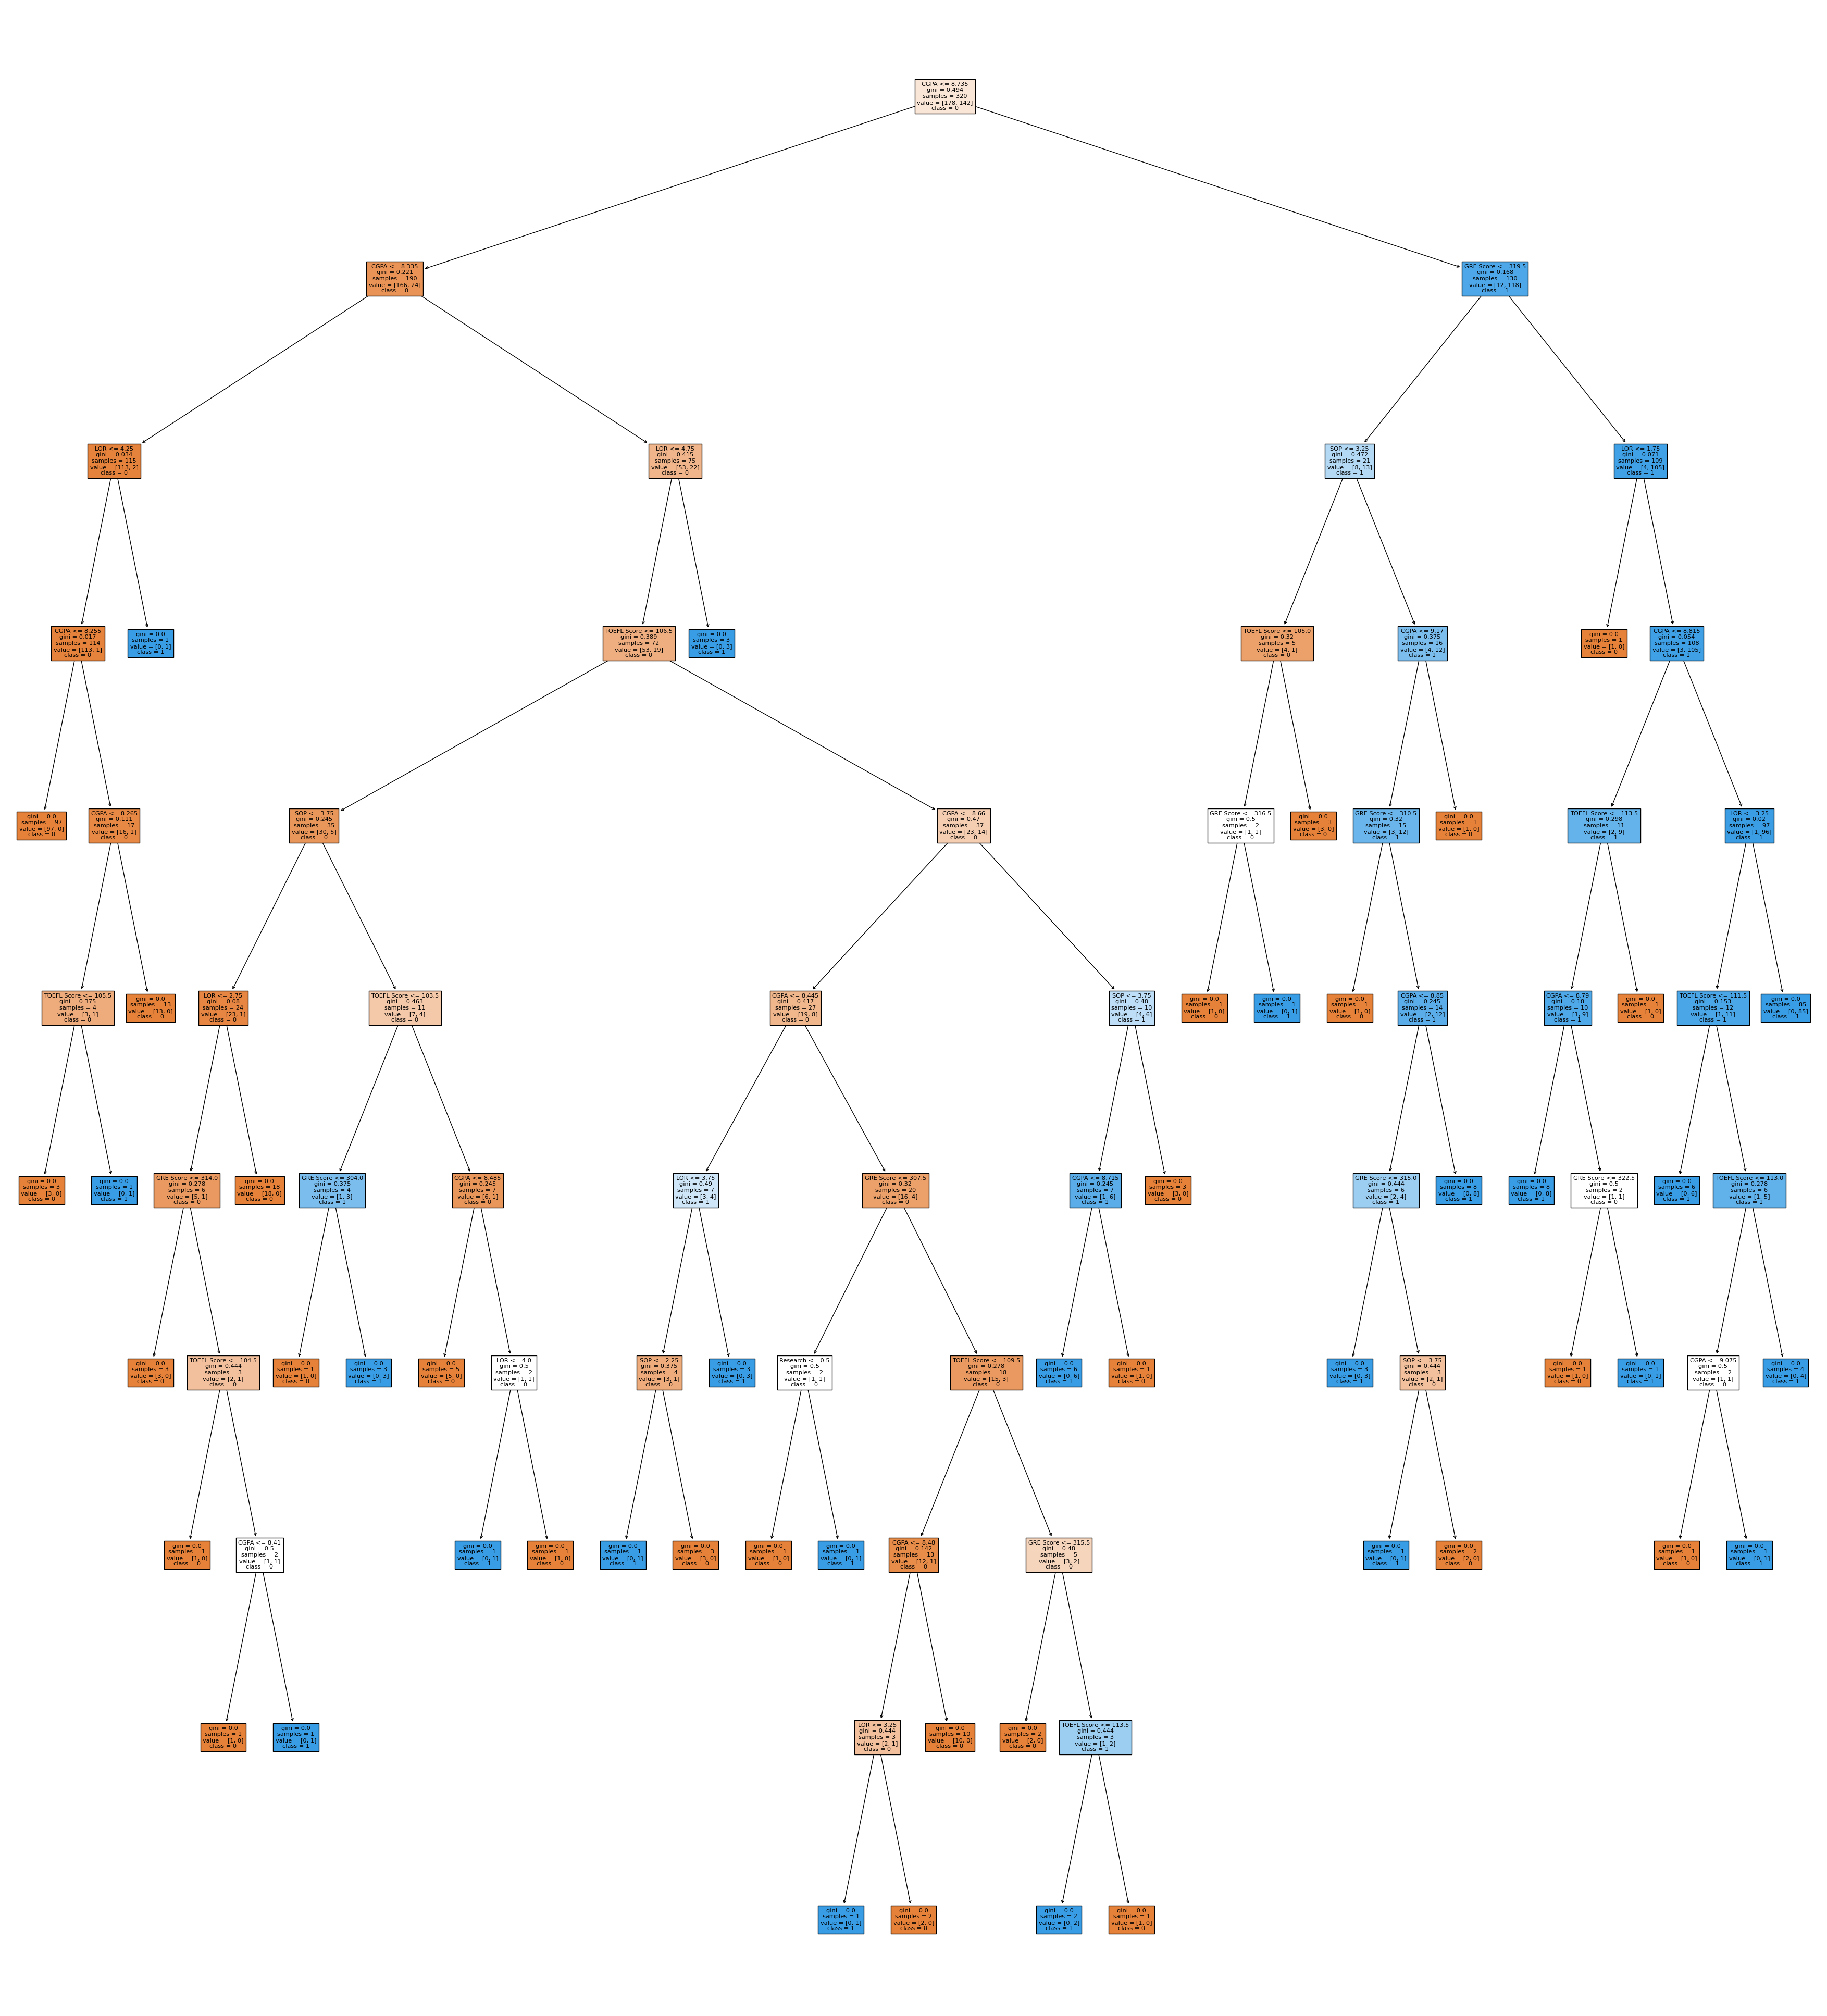

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(dt,
                   feature_names=xtrain.columns,
                   class_names=["0","1"],
                   filled=True) # it gives all the nodes in the color. If this is false then all of them will be in white

1. There are 2 colours. Orange and Blue.
2. Leaf are dark in colour. Dark Orange and Dark Blue. These are the ones which are completely pure.
3. Where ever, you see the white, it means that they are equal classes. Gini is 0.5.

**Lets build Tree with criteria =Entropy**

In [ ]:
dt_e = DecisionTreeClassifier(criterion='entropy',random_state=10)

dt_e.fit(xtrain,ytrain)

ypred_dt_e = dt_e.predict(xtest)


print(accuracy_score(ytest,ypred_dt_e))
print(confusion_matrix(ytest,ypred_dt_e))
print(classification_report(ytest,ypred_dt_e))

0.8
[[33  9]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.78      0.82      0.79        38

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



**Summarize the Decision Tree using Criterion as Entropy**

In [ ]:
update_performance(name = 'Decision Tree-Entropy', model = dt_e,test=ytest,pred=ypred_dt_e)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.825,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.850,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.775,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.800,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.800,0.815789,0.775000,0.794872


**Lets Visualize the Tree formation using Entropy as the Criterion**

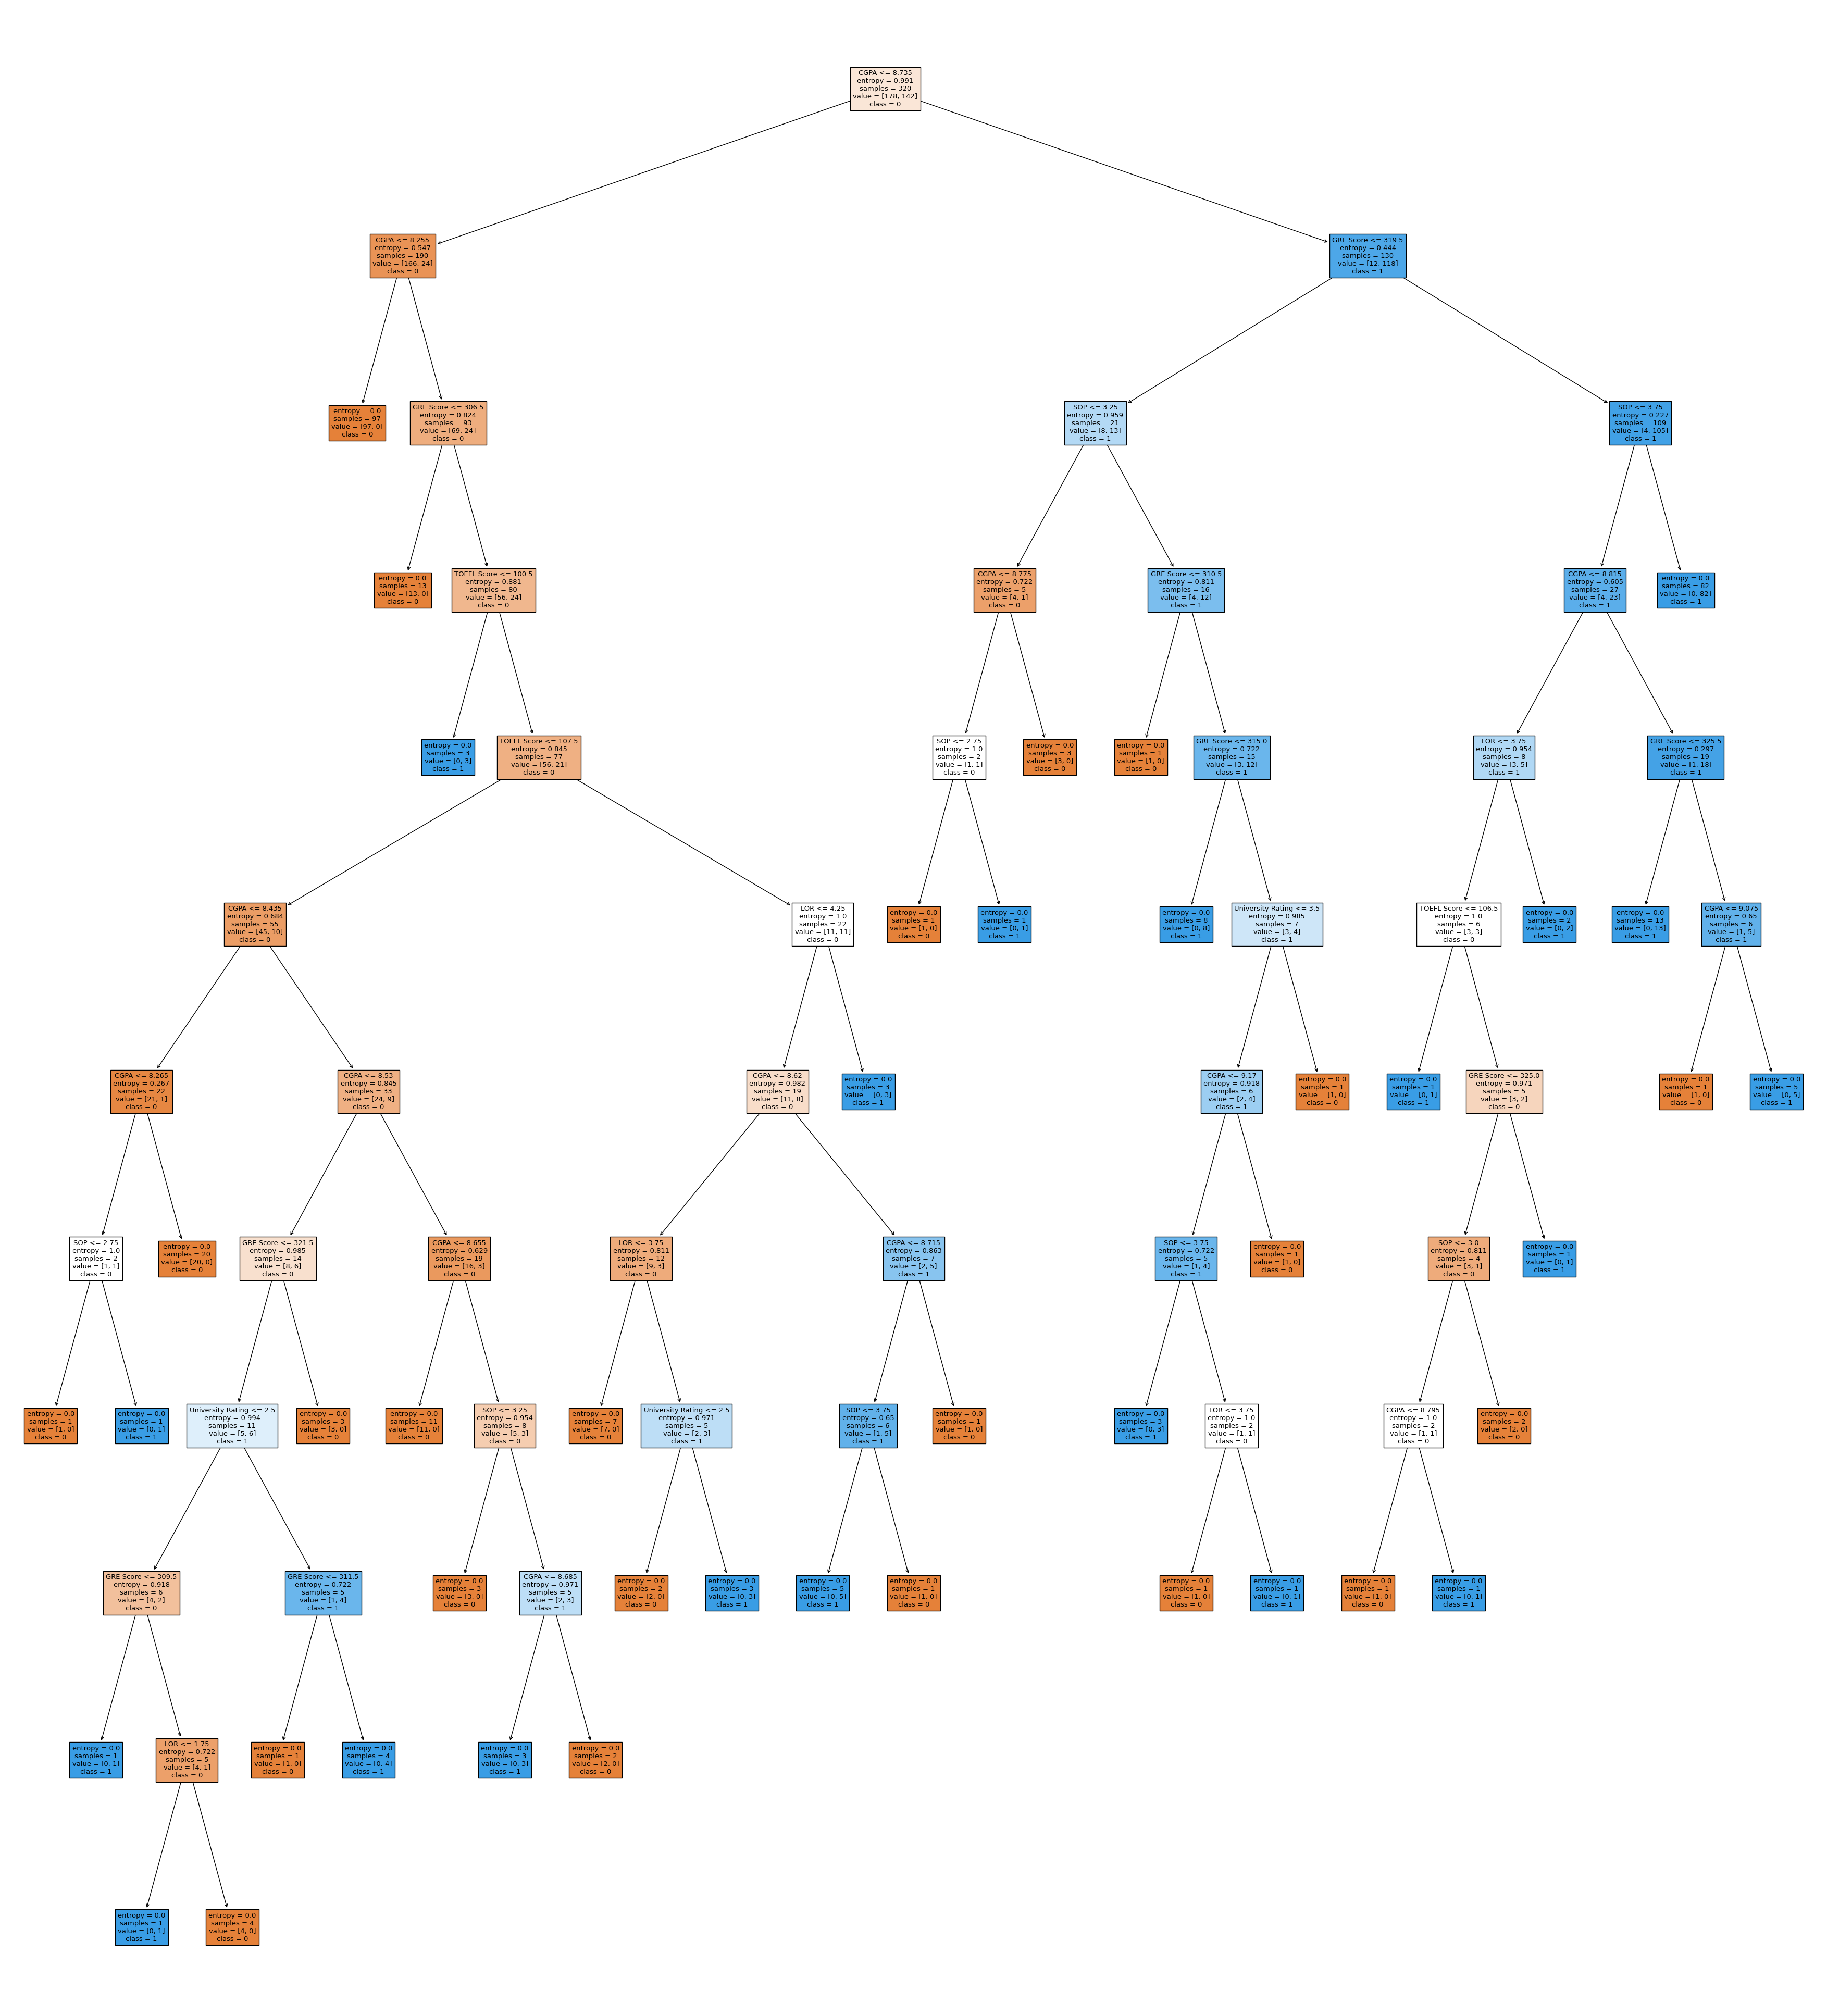

In [ ]:
fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(dt_e,
                   feature_names=xtrain.columns,
                   class_names=["0","1"],
                   filled=True) # it gives all the nodes in the color. If this is false then all of them will be in white

1. Tree will not be the same. But there will be some similarity.
2. This tree will also grow till it finds pure nodes.

**Lets Introduce some Hyper Parameters to tune the decision tree**

1. Max_Depth =None by default. Which means allow the tree to grow as much as possible.

In [ ]:
dt_e3 = DecisionTreeClassifier(criterion='entropy',max_depth = 3,random_state=10)

dt_e3.fit(xtrain,ytrain)

ypred_dt_e3 = dt_e3.predict(xtest)

print(accuracy_score(ytest,ypred_dt_e3))
print(confusion_matrix(ytest,ypred_dt_e3))
print(classification_report(ytest,ypred_dt_e3))

0.85
[[37  5]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.86      0.82      0.84        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



**Generate a e3 Tree**

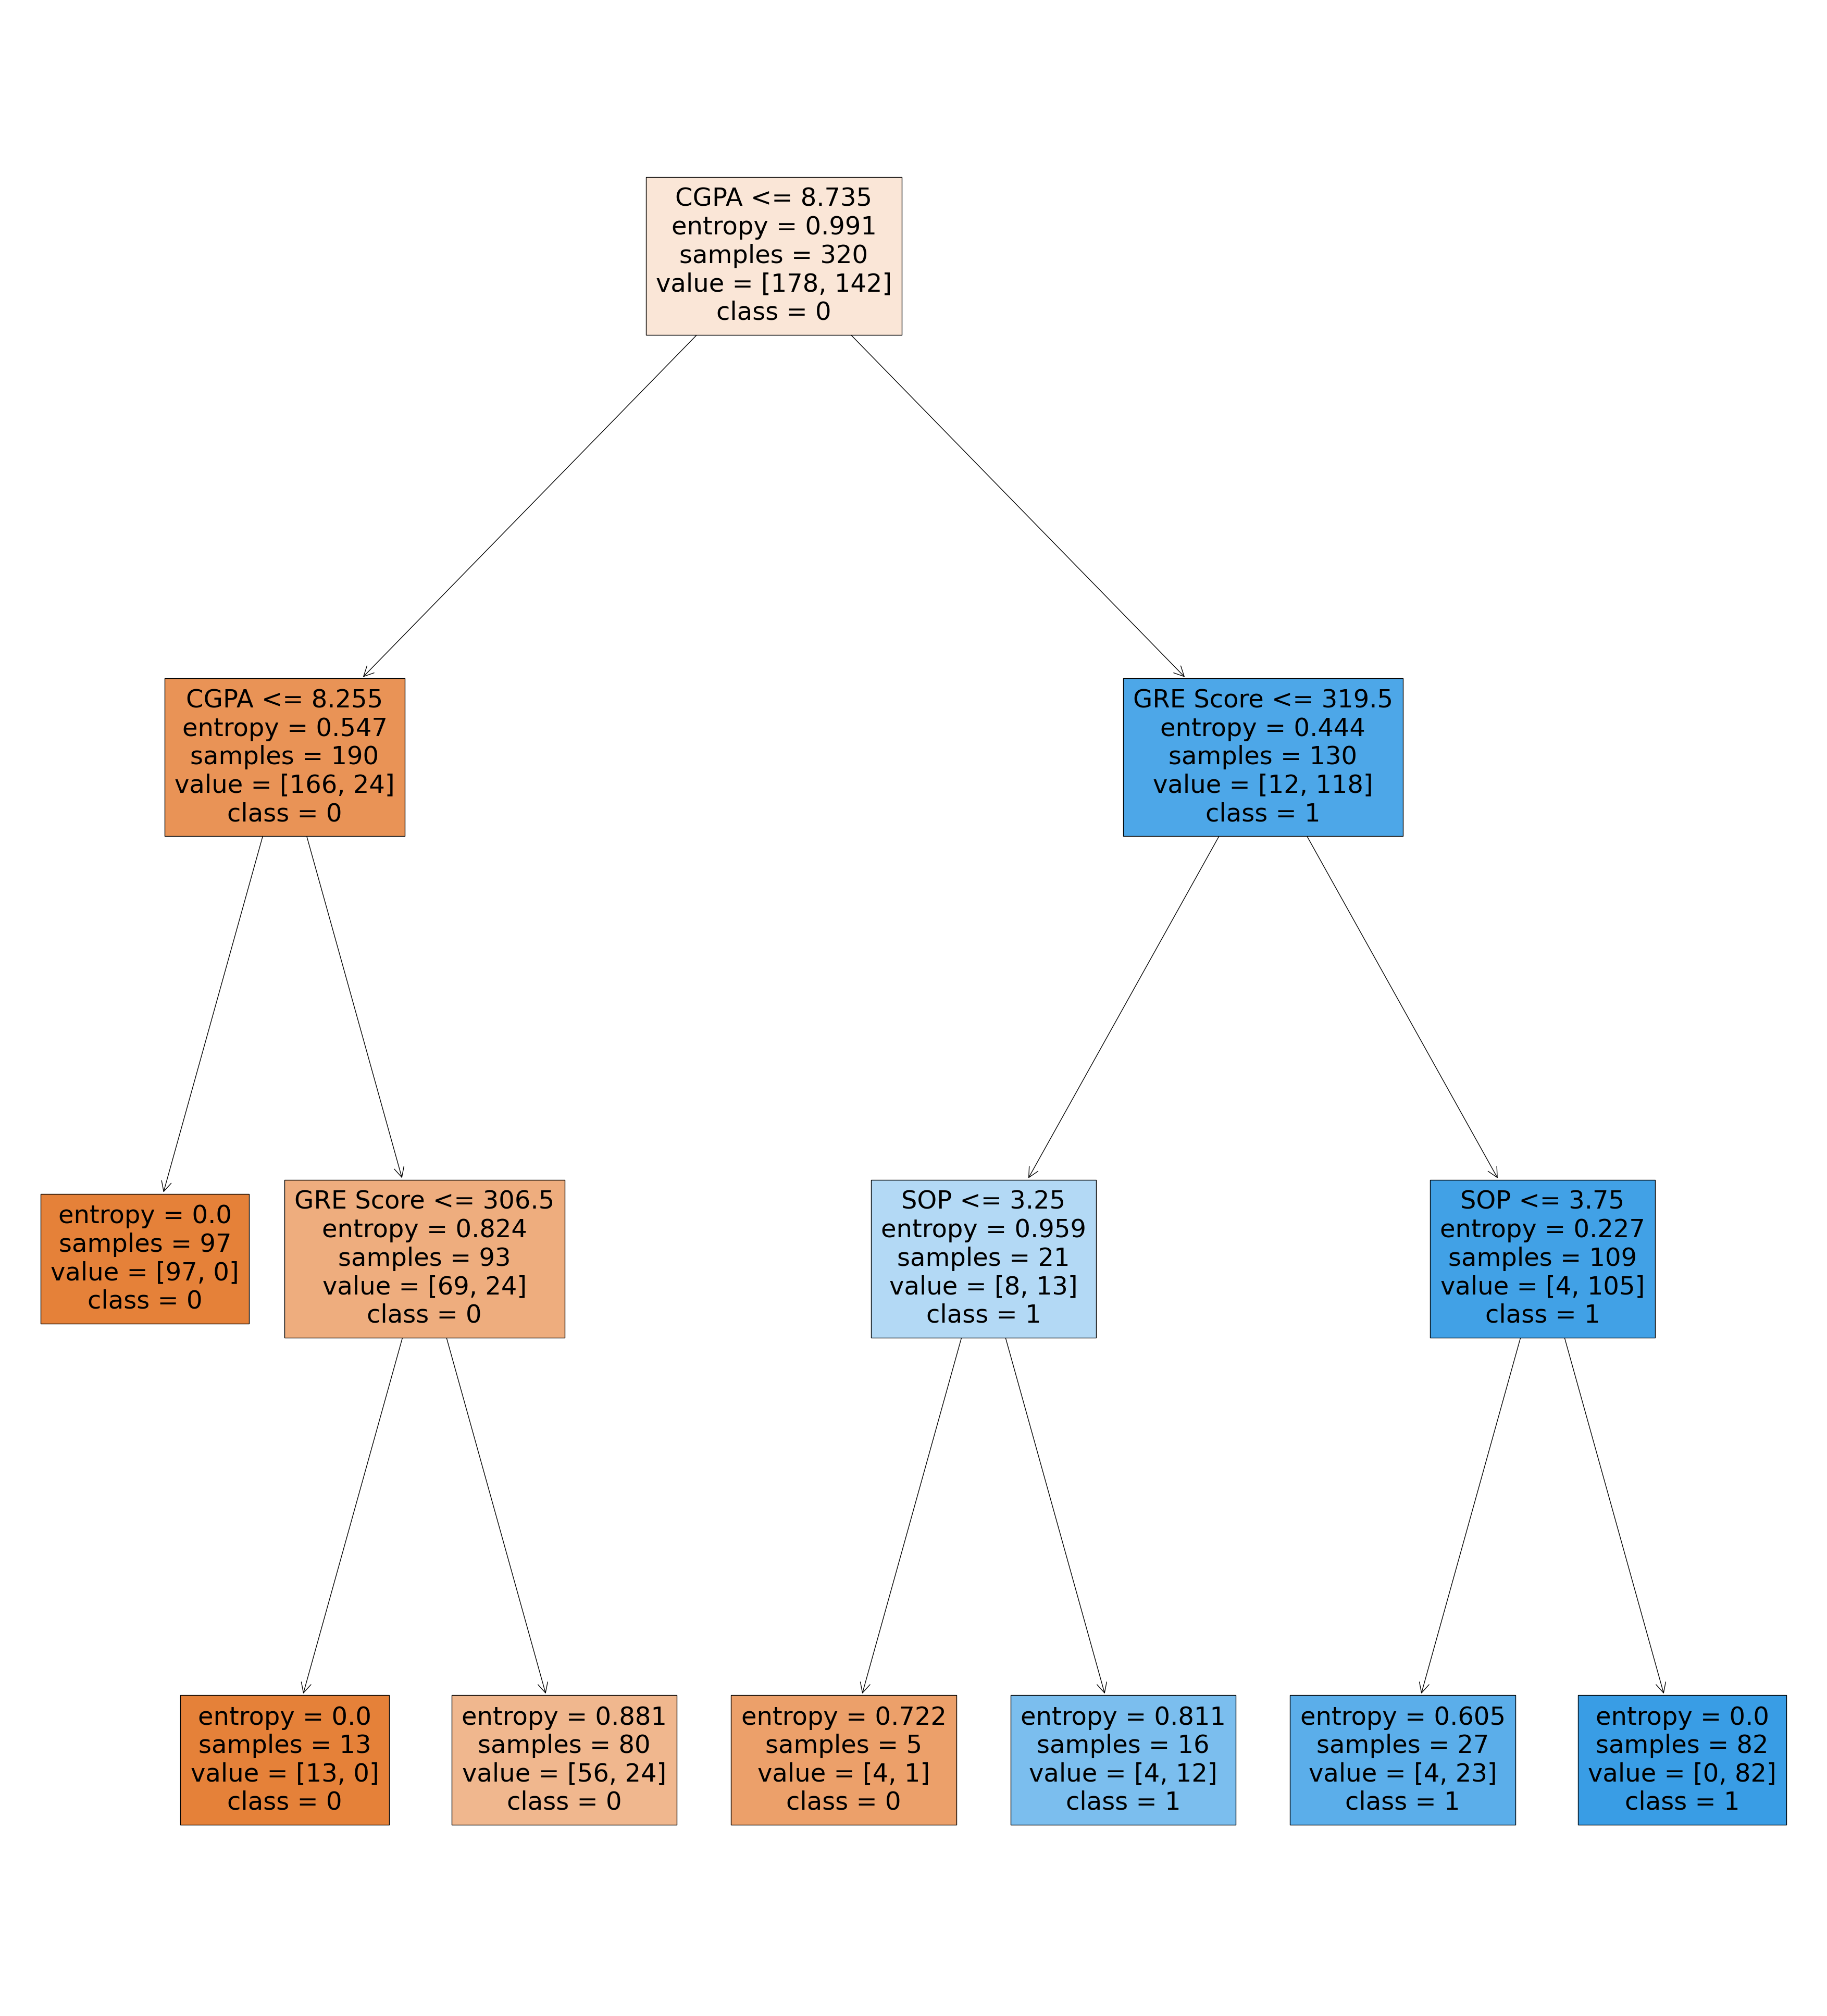

In [ ]:
fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(dt_e3,
                   feature_names=xtrain.columns,
                   class_names=["0","1"],
                   filled=True) # it gives all the nodes in the color. If this is false then all of them will be in white

1. Now the Tree will go till the depth of 3.
2. We build 3 Trees - Decision tree with Gini, DT with entropy (dt_e) and DT with entropy and Max_depth = 5.

Lets now understand the importance of features. Are all the features important.

In [ ]:
dt.feature_importances_

array([0.07708937, 0.06772328, 0.        , 0.06195703, 0.07343017,
       0.71347003, 0.00633012])

1. The third feature is 0 which means it is not important.
2. Sixth feature is high value which means it is  very important.

In [ ]:
xtrain.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [ ]:
feature_imp = pd.DataFrame()
feature_imp['Feature']=xtrain.columns
feature_imp['Importance']=dt.feature_importances_

In [ ]:
feature_imp

,Feature,Importance
0,GRE Score,0.077089
1,TOEFL Score,0.067723
2,University Rating,0.000000
3,SOP,0.061957
4,LOR,0.073430
5,CGPA,0.713470
6,Research,0.006330


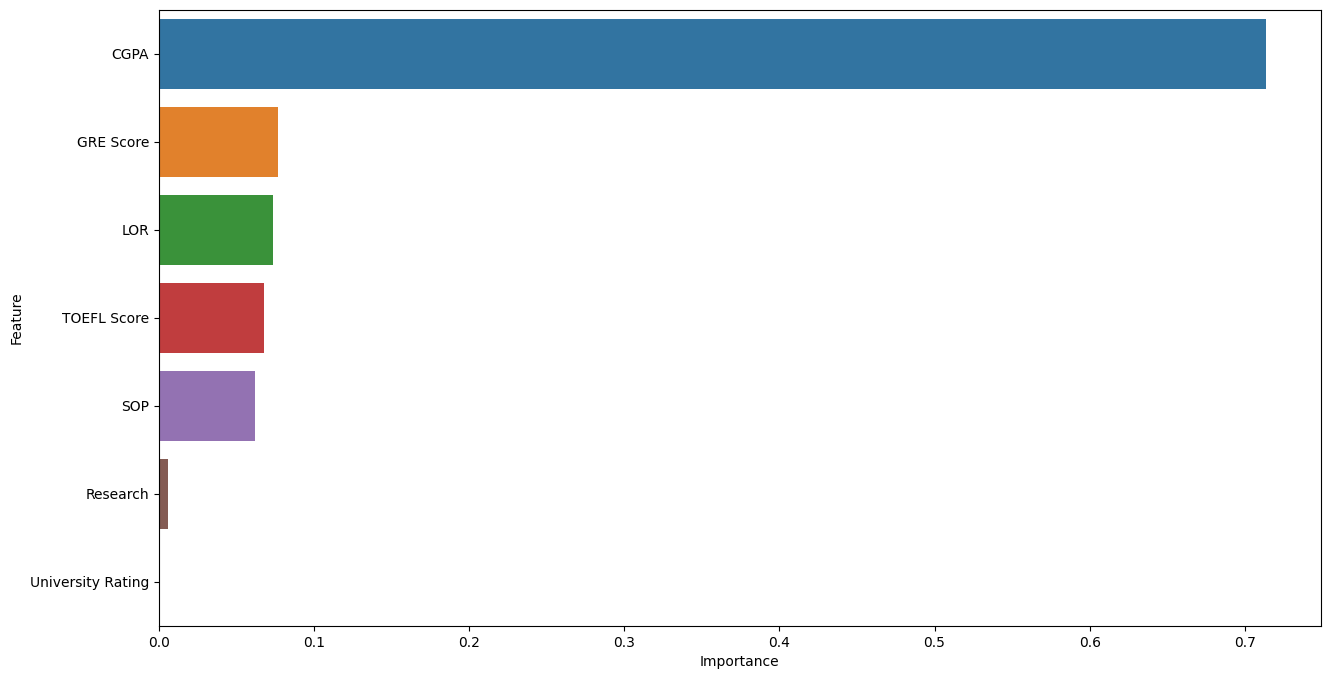

In [ ]:
feature_imp = feature_imp.sort_values('Importance',ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.show()

Feature CGPA is very important compared to other feature.

**To Find Overfit and Underfitting conditions**

In [ ]:
print('Train Accuracy',dt.score(xtrain,ytrain))
print('Test Accuracy',dt.score(xtest,ytest))

Train Accuracy 1.0
Test Accuracy 0.8


1. This is overfitting model as the training accuracy is  1.0
2. dt_score is the same as that for accuracy.
3. Here we had seen model with criterion as Gini

In [ ]:
print('Train Accuracy',dt_e.score(xtrain,ytrain))
print('Test Accuracy',dt_e.score(xtest,ytest))

Train Accuracy 1.0
Test Accuracy 0.8


1. This is overfitting model as the training accuracy is  1.0
2. dt_score is the same as that for accuracy.
3. Here we had seen model with criterion as Entropy

1. The model is better than full model.
2. The model is not overfitting because there is very less variance between the train and test.
3. Cutting down the brances is bringing down the overfitting conditions
4. Cutting the down the tree technique is called as Pruning. Thus by using just one parameter, we overcame the problem of overfitting.
5. This model has entropy and one hyperparameter.

## Over-fitting in Decision Tree

1. The decision tree is said to be over-fitted if it tries to perfectly fit all the observations in the training data. We can calculate the difference between the train and test accuracy to identify if there is over-fitting.
2. Overfitting occurs as the decision tree tries to get the purest form irrespective of the depth of the decision tree.  The tree becomes very big and lands up to be complex algo with several nodes.
3. Overfitting means tree is fitting well on training data and performs poorly on test data.

**Use of GridSearchCV to find which depth is good one**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tuned_paramaters = [{'criterion': ['entropy','gini'],
                     'max_depth': [2,3,5,6,7,8,9,10],
}]

In [ ]:
dt = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = dt, # The estimator can be is logistic, Linear reg, decision tree
                         param_grid = tuned_paramaters,
                         cv = 5)

In [ ]:
tree_grid_model = tree_grid.fit(xtrain, ytrain)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 2} 



In [ ]:
ypred_dt_tp = tree_grid_model.predict(xtest)

print(accuracy_score(ytest,ypred_dt_tp))
print(confusion_matrix(ytest,ypred_dt_tp))
print(classification_report(ytest,ypred_dt_tp))

0.85
[[37  5]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.86      0.82      0.84        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



In [ ]:
print('Train Accuracy',tree_grid_model.score(xtrain,ytrain))
print('Test Accuracy',tree_grid_model.score(xtest,ytest))

Train Accuracy 0.8875
Test Accuracy 0.85


**Lets Look at Other Hyparameters**

In [ ]:
tuned_paramaters = [{'criterion': ['entropy','gini'],
                     'max_depth': [5,10],  # 5,6,7,
                     'max_features': ["sqrt", "log2"], # it can be either square root of the feature or log of number of features
                     'min_samples_split': [2,5,8], # 1-3% of the total records
                     'min_samples_leaf': [1,5,9], # 1-3% of the min_sample_split
                     'max_leaf_nodes': [5,8]}]

In [ ]:
dt = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = dt, # The estimator can be is logistic, Linear reg, decision tree
                         param_grid = tuned_paramaters,
                         cv = 5)

In [ ]:
tree_grid_model = tree_grid.fit(xtrain, ytrain)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 9, 'min_samples_split': 2} 



In [ ]:
dt_grid_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 5,
                                  min_samples_leaf = 9,
                                  min_samples_split = 2,
                                  random_state = 10)

In [ ]:
dt_grid_model= dt_grid_model.fit(xtrain,ytrain)

In [ ]:
ypred_dt_tp = dt_grid_model.predict(xtest)

print(accuracy_score(ytest,ypred_dt_tp))
print(confusion_matrix(ytest,ypred_dt_tp))
print(classification_report(ytest,ypred_dt_tp))

0.8375
[[35  7]
 [ 6 32]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.82      0.84      0.83        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



In [ ]:
print('Train Accuracy',tree_grid_model.score(xtrain,ytrain))
print('Test Accuracy',tree_grid_model.score(xtest,ytest))

Train Accuracy 0.859375
Test Accuracy 0.8375


1.The model performance is 83%.


In [ ]:
ypred_dt_dp_train = tree_grid_model.predict(xtrain)

In [ ]:
print(classification_report(ytrain,ypred_dt_dp_train))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       178
           1       0.93      0.74      0.82       142

    accuracy                           0.86       320
   macro avg       0.88      0.85      0.85       320
weighted avg       0.87      0.86      0.86       320



In [ ]:
# evaluate using confusion matrix.

print(confusion_matrix(ytest,ypred_dt_tp))

[[35  7]
 [ 6 32]]


In [ ]:
print(classification_report(ytest,ypred_dt_tp))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.82      0.84      0.83        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



In [ ]:
print(classification_report(ytest,ypred_dt_tp))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.82      0.84      0.83        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



### Lets Summarize the Findings

In [ ]:
update_performance(name = 'Decision Tree-Tuned', model = dt_grid_model,test=ytest,pred=ypred_dt_tp)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169


**Summary**

1. Decision Tree works better than Logistic Regression for the dataset given.
2. Decision Tree performance was enhanced further by fine tuning parameters.

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

**Training Performance**

In [ ]:
#Training Data

ypred_knn_trn = knn.predict(xtrain)

print(accuracy_score(ytrain,ypred_knn_trn))
print(confusion_matrix(ytrain,ypred_knn_trn))
print(classification_report(ytrain,ypred_knn_trn))

0.8875
[[164  14]
 [ 22 120]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       178
           1       0.90      0.85      0.87       142

    accuracy                           0.89       320
   macro avg       0.89      0.88      0.89       320
weighted avg       0.89      0.89      0.89       320



1. Memorization happens on the training test
2. All the calculations happens when we give .predict(}

**Testing Performance**

In [ ]:
#Testing Data

ypred_knn = knn.predict(xtest)

print(accuracy_score(ytest,ypred_knn))
print(confusion_matrix(ytest,ypred_knn))
print(classification_report(ytest,ypred_knn))


0.8375
[[33  9]
 [ 4 34]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        42
           1       0.79      0.89      0.84        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



**Lets Summarize the results**

In [ ]:
update_performance(name = 'KNearestNeighbour', model = knn,test=ytest,pred=ypred_knn)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506


**Cross Val Score**

by default the split is 5. We can use cv=3.

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn,xtrain,ytrain,scoring="accuracy")
score


array([0.84375 , 0.796875, 0.796875, 0.9375  , 0.8125  ])

In [ ]:
np.mean(score)

0.8375

In [ ]:
ypred_knn

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

1. [0.8, 0.2],The model says there is 80% probability that Data point 1 belongs to class 0 and 20% probability that it belongs to class 1.
2. [0.2, 0.8] The model says that there is 20% probability that the Data Point 2 belongs to class 0 and 80% probability that data point 2 belongs to class 1.
3. Whichever, Data point has higher probability, it belongs to that class.
4. For ROC, we need probability. Hence, we are using, predict.proba

In [ ]:
ypred_prob_knn= knn.predict_proba(xtest)
ypred_prob_knn

array([[0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0. ,

1. ROC curve is based on TPR and FPR
2. Focus is on class 1. Disease , default, diabetic.
3. Our focus is only on column 1 and not the 0 class.

Take all the rows and first column.

In [ ]:
ypred_prob_knn[:,1]

array([0.2, 0.8, 0. , 0. , 0. , 0. , 1. , 1. , 1. , 0.2, 0.6, 1. , 0.8,
       0. , 1. , 1. , 0. , 0.8, 1. , 0.4, 1. , 0.6, 1. , 0.6, 0.4, 0.4,
       0.2, 1. , 0. , 0.6, 0.4, 0.6, 0.8, 1. , 0.2, 1. , 0. , 0. , 0.8,
       0.8, 1. , 0.8, 0.6, 0. , 0. , 0. , 0. , 0. , 0.2, 1. , 1. , 0.2,
       1. , 1. , 0. , 0.2, 0.8, 0.4, 0. , 0.2, 0. , 0.8, 0.6, 1. , 0. ,
       1. , 0.6, 0.4, 1. , 0. , 1. , 1. , 0.8, 0.2, 1. , 0. , 1. , 0. ,
       1. , 0. ])

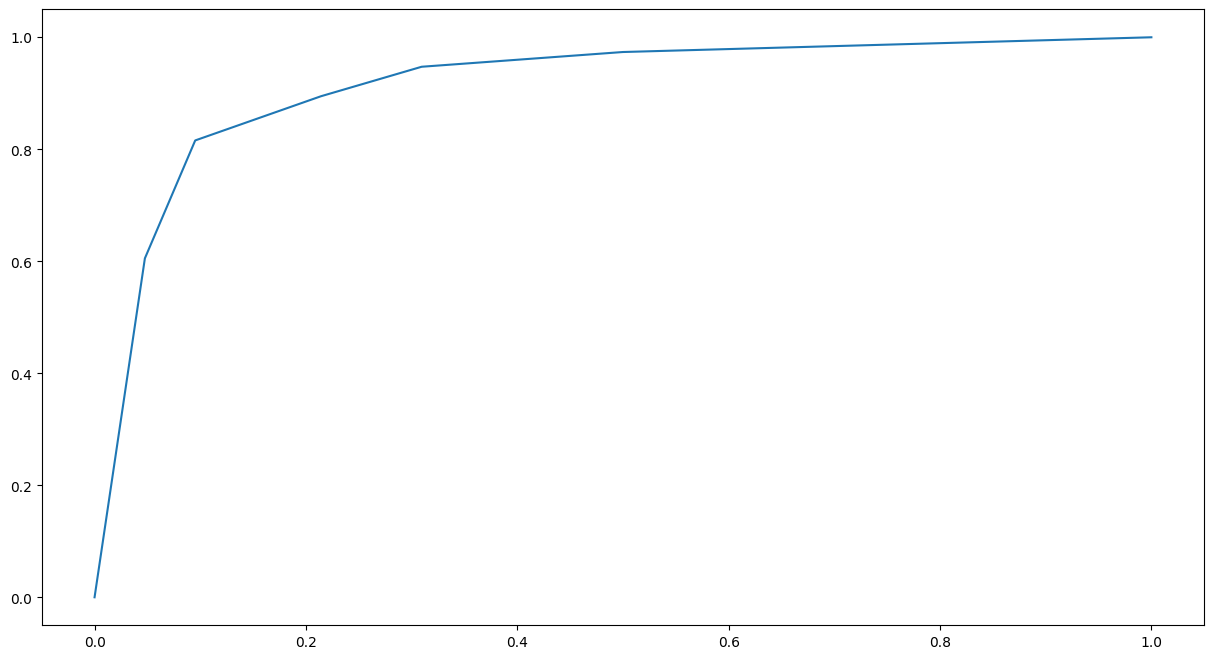

0.9141604010025063


In [ ]:
ypred_prob_knn_1 = ypred_prob_knn[:,1] # collects all the probabilities belonging to class to 1.

fpr, tpr, threshold = roc_curve(ytest,ypred_prob_knn_1) # it gives 3 outputs - tpr, fpr and threshold.

plt.plot(fpr,tpr)
plt.show()

print(roc_auc_score(ytest,ypred_prob_knn_1))

**Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error**

Hint: Misclassification error **(MCE) = 1 - Test accuracy score.** Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [ ]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    # evaluate test accuracy
    scores = knn.score(xtest, ytest)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.19999999999999996,
 0.17500000000000004,
 0.16249999999999998,
 0.15000000000000002,
 0.11250000000000004,
 0.11250000000000004,
 0.11250000000000004,
 0.13749999999999996,
 0.13749999999999996,
 0.125]

**Plot misclassification error vs k (with k value on X-axis) using matplotli**

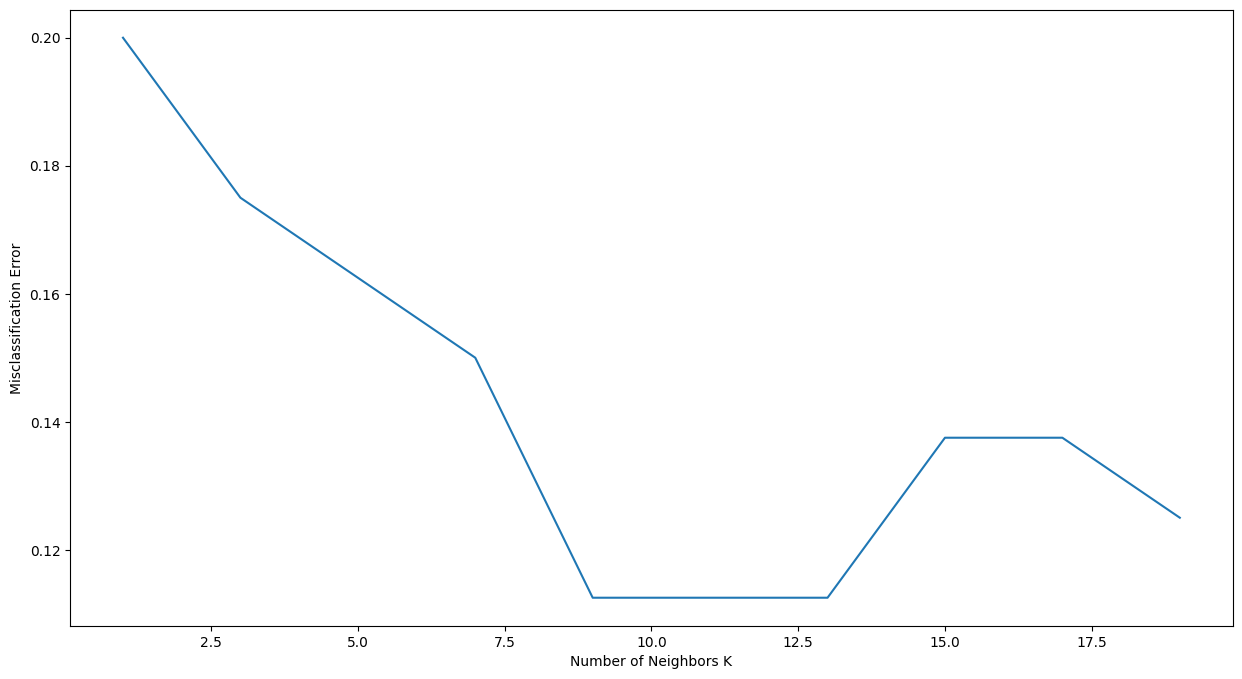

In [ ]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
#Training Data

ypred_knn_trn = knn.predict(xtrain)

print(accuracy_score(ytrain,ypred_knn_trn))
print(confusion_matrix(ytrain,ypred_knn_trn))
print(classification_report(ytrain,ypred_knn_trn))

0.85625
[[164  14]
 [ 32 110]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       178
           1       0.89      0.77      0.83       142

    accuracy                           0.86       320
   macro avg       0.86      0.85      0.85       320
weighted avg       0.86      0.86      0.85       320



In [ ]:
#Testing Data

ypred_knn = knn.predict(xtest)

print(accuracy_score(ytest,ypred_knn))
print(confusion_matrix(ytest,ypred_knn))
print(classification_report(ytest,ypred_knn))

0.8875
[[35  7]
 [ 2 36]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.89        42
           1       0.84      0.95      0.89        38

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80



In [ ]:
pars = {'n_neighbors':[6,8,10,12,14,16,18],
       'algorithm':['auto','ball_tree','kd_tree','brute'],
       'p':[1,2],
       'metric':['minkowski','euclidean','manhattan','chebyshev','mahalanobis']}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_knn =GridSearchCV(KNeighborsClassifier(),param_grid=pars, refit=True, verbose =1)
grid_knn.fit(xtrain,ytrain)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev', 'mahalanobis'],
                         'n_neighbors': [6, 8, 10, 12, 14, 16, 18],
                         'p': [1, 2]},
             verbose=1)

In [ ]:
grid_knn.best_params_

{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 6, 'p': 1}

In [ ]:
knn_grid=KNeighborsClassifier(n_neighbors=6,
                         algorithm='auto',
                         metric = 'minkowski',
                         p=1

                         )
knn_grid.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=6, p=1)

In [ ]:
print('Classification report Train set :')
print(classification_report(ytrain,knn_grid.predict(xtrain)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       178
           1       0.91      0.78      0.84       142

    accuracy                           0.87       320
   macro avg       0.88      0.86      0.86       320
weighted avg       0.87      0.87      0.87       320



In [ ]:
print('Classification report Test set :')
print(classification_report(ytest,knn_grid.predict(xtest)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        42
           1       0.85      0.89      0.87        38

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.87        80
weighted avg       0.88      0.88      0.88        80



In [ ]:
print('Classification report Train set :')
print(classification_report(ytrain,grid_knn.predict(xtrain)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       178
           1       0.91      0.78      0.84       142

    accuracy                           0.87       320
   macro avg       0.88      0.86      0.86       320
weighted avg       0.87      0.87      0.87       320



In [ ]:
print('Classification report Test set :')
print(classification_report(ytest,grid_knn.predict(xtest)))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        42
           1       0.85      0.89      0.87        38

    accuracy                           0.88        80
   macro avg       0.88      0.88      0.87        80
weighted avg       0.88      0.88      0.88        80



In [ ]:
ypred_knn = knn_grid.predict(xtest)

In [ ]:
update_performance(name = 'KNearestNeighbour-grid', model = knn_grid,test=ytest,pred=ypred_knn)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795


**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [ ]:
gnb = GaussianNB()

**Training Performance**

In [ ]:
gnb.fit(xtrain,ytrain)


ypred_gnb_train = gnb.predict(xtrain)

print(accuracy_score(ytrain,ypred_gnb_train))
print(confusion_matrix(ytrain,ypred_gnb_train))
print(classification_report(ytrain,ypred_gnb_train))



0.88125
[[162  16]
 [ 22 120]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       178
           1       0.88      0.85      0.86       142

    accuracy                           0.88       320
   macro avg       0.88      0.88      0.88       320
weighted avg       0.88      0.88      0.88       320



**Testing Performance**

In [ ]:
gnb.fit(xtrain,ytrain)

ypred_gnb = gnb.predict(xtest)

print(accuracy_score(ytest,ypred_gnb))
print(confusion_matrix(ytest,ypred_gnb))
print(classification_report(ytest,ypred_gnb))

0.85
[[34  8]
 [ 4 34]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        42
           1       0.81      0.89      0.85        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



Summarizing the performance

In [ ]:
update_performance(name = 'Gaussian NB', model = gnb,test=ytest,pred=ypred_gnb)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000


**Bernoulli NB**

In [ ]:
bnb = BernoulliNB()

**Training Performance**

In [ ]:
bnb.fit(xtrain,ytrain)


ypred_bnb_train = bnb.predict(xtrain)

print(accuracy_score(ytrain,ypred_bnb_train))
print(confusion_matrix(ytrain,ypred_bnb_train))
print(classification_report(ytrain,ypred_bnb_train))

0.75625
[[123  55]
 [ 23 119]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       178
           1       0.68      0.84      0.75       142

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.77      0.76      0.76       320



**Testing Performance**

In [ ]:

bnb.fit(xtrain,ytrain)


ypred_bnb = bnb.predict(xtest)

print(accuracy_score(ytest,ypred_bnb))
print(confusion_matrix(ytest,ypred_bnb))
print(classification_report(ytest,ypred_bnb))

0.7375
[[28 14]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        42
           1       0.69      0.82      0.75        38

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.75      0.74      0.74        80



**Lets Summarize the outcomes**

In [ ]:
update_performance(name = 'Bernoulli NB', model = bnb,test=ytest,pred=ypred_bnb)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


**Multinomial Naive Bayes**

In [ ]:
mnb = MultinomialNB()

**Training Performance**

In [ ]:
mnb.fit(xtrain,ytrain)


ypred_mnb_train = mnb.predict(xtrain)

print(accuracy_score(ytrain,ypred_mnb_train))
print(confusion_matrix(ytrain,ypred_mnb_train))
print(classification_report(ytrain,ypred_mnb_train))

0.825
[[151  27]
 [ 29 113]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       178
           1       0.81      0.80      0.80       142

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320



**Testing Performance**

In [ ]:


mnb.fit(xtrain,ytrain)


ypred_mnb = mnb.predict(xtest)

print(accuracy_score(ytest,ypred_mnb))
print(confusion_matrix(ytest,ypred_mnb))
print(classification_report(ytest,ypred_mnb))

0.8125
[[34  8]
 [ 7 31]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.79      0.82      0.81        38

    accuracy                           0.81        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.81      0.81      0.81        80



**Summarize the outcomes from the model**

In [ ]:
update_performance(name = 'Multinomial NB', model = mnb,test=ytest,pred=ypred_mnb)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


**What is OOB ? **

Probability of being selected is 1 /N

Probability of not being selected is 1- 1/N

For several N , the probability can be expressed as (1-1/N)^N

SAY WE HAVE 50,000 rows not being selected

In [ ]:
# (1-(1/50000)) RAISED to 50000
pow(1-(1/50000), 50000)

0.3678757623460058

## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=10)
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=10)

**Training Performance**

In [ ]:
ypred_rf_train = rf.predict(xtrain)

print(accuracy_score(ytrain,ypred_rf_train))
print(confusion_matrix(ytrain,ypred_rf_train))
print(classification_report(ytrain,ypred_rf_train))

1.0
[[178   0]
 [  0 142]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       142

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



**Testing Performance**

In [ ]:
rf.fit(xtrain,ytrain)
ypred_rf = rf.predict(xtest)

print(accuracy_score(ytest,ypred_rf))
print(confusion_matrix(ytest,ypred_rf))
print(classification_report(ytest,ypred_rf))


0.85
[[35  7]
 [ 5 33]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        42
           1       0.82      0.87      0.85        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



1. There are 2 ways at looking whether the model is overfit or underfit models
2. By using classification report or using score function

In [ ]:
print('Train Accuracy',rf.score(xtrain,ytrain))
print('Test Accuracy',rf.score(xtest,ytest))

Train Accuracy 1.0
Test Accuracy 0.85


1. The model is still overfitting even when we have 100 trees.

**Summarize the outcomes for Random Forest**

In [ ]:
update_performance(name = 'Random Forest', model = rf,test=ytest,pred=ypred_rf)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


**OOB SAMPLE -PERFORMANCE**

In [ ]:
rf = RandomForestClassifier(oob_score=True, random_state=10)

rf.fit(xtrain,ytrain)

ypred_rf = rf.predict(xtest)
print(accuracy_score(ytest,ypred_rf))

print(rf.oob_score_)


0.85
0.871875


**Is there a scope for Improvement -Lets Fine Tune the performance of Random Forest**

In [ ]:
params =             [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [100],
                     'max_depth': [10, 15],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 8],
                     'min_samples_leaf': [5, 9],
                     'max_leaf_nodes': [8, 11]}]

In [ ]:
rf =RandomForestClassifier(random_state=10)

rf_cv = GridSearchCV(rf,params,cv=5,scoring='accuracy')

rf_cv.fit(xtrain,ytrain)

rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:

rf_model = RandomForestClassifier(criterion ='entropy' ,
                                  n_estimators =100 ,
                                  max_depth = 10 ,
                                  max_features = 'sqrt',
                                  max_leaf_nodes =8 ,
                                  min_samples_leaf =5 ,
                                  min_samples_split = 2,
                                  random_state = 10)


rf_model.fit(xtrain,ytrain)

ypred_rf_tp = rf_model.predict(xtest)

print(accuracy_score(ytest,ypred_rf_tp))
print(confusion_matrix(ytest,ypred_rf_tp))
print(classification_report(ytest,ypred_rf_tp))

0.85
[[34  8]
 [ 4 34]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        42
           1       0.81      0.89      0.85        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



Summarize the performance

In [ ]:
update_performance(name = 'Random Forest-Tunned', model = rf_model,test=ytest,pred=ypred_rf_tp)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


## BAGGING CLASSIFIER

In [ ]:
from sklearn.ensemble import BaggingClassifier

dt=DecisionTreeClassifier(random_state=10)

bc=BaggingClassifier(dt) # by default the estimator is Decision Tree
bc.fit(xtrain,ytrain)

ypred_bc = bc.predict(xtest)

print(accuracy_score(ytest,ypred_bc))

0.8


Summarizing the performance

In [ ]:
update_performance(name = 'Bagging Classifier-dt', model = bc,test=ytest,pred=ypred_bc)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


### KNN MODEL AS base model

In [ ]:
from sklearn.ensemble import BaggingClassifier

knn=KNeighborsClassifier()

bag_knn=BaggingClassifier(knn,random_state=10) # by default the estimator is Decision Tree
bag_knn.fit(xtrain,ytrain)

ypred_bag_knn = bag_knn.predict(xtest)

print(accuracy_score(ytest,ypred_bag_knn))

0.8375


1. The model performance has improved compared to RF and Decision Tree
2. We have to run several models and then check the performance

Summarizing the performance

In [ ]:
update_performance(name = 'Bagging Classifier-knn', model = bag_knn,test=ytest,pred=ypred_bag_knn)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


### Bagging -LR Model. LR as base model

In [ ]:

logr=LogisticRegression()

bag_logr=BaggingClassifier(logr,random_state=10) # by default the estimator is Decision Tree
bag_logr.fit(xtrain,ytrain)

ypred_bag_logr = bag_logr.predict(xtest)

print(accuracy_score(ytest,ypred_bag_logr))

0.825


Summarizing the performance

In [ ]:
update_performance(name = 'Bagging Classifier-Log', model = bag_logr,test=ytest,pred=ypred_bag_logr)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


**Ensemble Learning- AdaBoosting**

In [ ]:
from sklearn.ensemble  import AdaBoostClassifier


Estimator as decision tree

In [ ]:
abcl = AdaBoostClassifier(dt,random_state=10)
abcl.fit(xtrain,ytrain)

ypred_abcl = abcl.predict(xtest)
print(accuracy_score(ytest,ypred_abcl))

0.775


Summarizing the performance

In [ ]:
update_performance(name = 'AdaBoost-dt', model = abcl,test=ytest,pred=ypred_abcl)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


Estimator as random forest

In [ ]:
abcl_rf = AdaBoostClassifier(rf_model,random_state=10)
abcl_rf.fit(xtrain,ytrain)

ypred_abcl_rf = abcl_rf.predict(xtest)
print(accuracy_score(ytest,ypred_abcl_rf))

0.8125


In [ ]:
update_performance(name = 'AdaBoost-rf', model = abcl_rf,test=ytest,pred=ypred_abcl_rf)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


Estimator as multinomial naive bayes

In [ ]:
abcl_mnb = AdaBoostClassifier(mnb,random_state=10)
abcl_mnb.fit(xtrain,ytrain)

ypred_abcl_mnb = abcl_mnb.predict(xtest)
print(accuracy_score(ytest,ypred_abcl_mnb))

0.475


In [ ]:
update_performance(name = 'AdaBoost-mnb', model = abcl_mnb,test=ytest,pred=ypred_abcl_mnb)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


Ensemble Learning - Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50,random_state=10)
gbcl.fit(xtrain,ytrain)
ypred_gbcl = gbcl.predict(xtest)
print(accuracy_score(ytest,ypred_gbcl))

0.8125


In [ ]:
gbcl = GradientBoostingClassifier(n_estimators=50,learning_rate=0.5,random_state=10,max_depth=3)
gbcl.fit(xtrain,ytrain)
ypred_gbcl = gbcl.predict(xtest)
print(accuracy_score(ytest,ypred_gbcl))

0.85


In [ ]:
gbcl = GradientBoostingClassifier(n_estimators=50,learning_rate=0.5,random_state=10,max_depth=3)
gbcl.fit(xtrain,ytrain)
ypred_gbcl = gbcl.predict(xtest)
print(accuracy_score(ytest,ypred_gbcl))

0.85


Summarizing the performance

In [ ]:
update_performance(name = 'Gradient Boosting', model = gbcl,test=ytest,pred=ypred_gbcl)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


XGBOOST

In [ ]:
# !pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb= XGBClassifier(random_state=10)
xgb.fit(xtrain,ytrain)


ypred_xgb= xgb.predict(xtest)
print(accuracy_score(ytest,ypred_xgb))

0.8125


In [ ]:
xgb= XGBClassifier(booster='gbtree',gamma=3,max_depth=3, min_child_weight=3,
                   n_estimator=50, reg_lambda=1,random_state=10)
xgb.fit(xtrain,ytrain)


ypred_xgb= xgb.predict(xtest)
print(accuracy_score(ytest,ypred_xgb))

[01:16:09] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

0.85


Summarizing the performance

In [ ]:
update_performance(name = 'XGB', model = xgb,test=ytest,pred=ypred_xgb)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


### STACKING

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()

In [ ]:
base_learners=[('lr_model',lr),('knn_model',knn),('DT_model',dt)]

stack =StackingClassifier(estimators=base_learners,
                          final_estimator=GaussianNB())

stack.fit(xtrain,ytrain)
ypred_stack = stack.predict(xtest)
print(accuracy_score(ytest,ypred_stack))

0.8375


Summarizing the performance

In [ ]:
update_performance(name = 'Stacking', model = stack,test=ytest,pred=ypred_stack)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988


### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
vote_hard =VotingClassifier(estimators=base_learners )

vote_hard.fit(xtrain,ytrain)
ypred_vote = vote_hard.predict(xtest)
print(accuracy_score(ytest,ypred_vote))

0.8


In [ ]:
vote_soft =VotingClassifier(estimators=base_learners ,voting='soft')

vote_soft.fit(xtrain,ytrain)
ypred_vote = vote_soft.predict(xtest)
print(accuracy_score(ytest,ypred_vote))

0.8


Summarizing the performance

In [ ]:
update_performance(name = 'Voting', model = vote_soft,test=ytest,pred=ypred_vote)

# print the dataframe
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,LogisticReg-Base,0.8250,0.868421,0.785714,0.825000
1,LogisticReg-Youden,0.8500,0.842105,0.842105,0.842105
2,LogisticReg-skl,0.7750,0.789474,0.750000,0.769231
3,Decision Tree-Gini,0.8000,0.815789,0.775000,0.794872
4,Decision Tree-Entropy,0.8000,0.815789,0.775000,0.794872
5,Decision Tree-Tuned,0.8375,0.842105,0.820513,0.831169
6,KNearestNeighbour,0.8375,0.894737,0.790698,0.839506
7,KNearestNeighbour-grid,0.8750,0.894737,0.850000,0.871795
8,Gaussian NB,0.8500,0.894737,0.809524,0.850000
9,Bernoulli NB,0.7375,0.815789,0.688889,0.746988
